# ReneWind

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library To use for missing value imputation
from sklearn.impute import SimpleImputer

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries for Oversampling and Undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

import time  # Module for time-related operations.
import random # Module for generating pseudo-random numbers.
from tensorflow.keras.initializers import GlorotUniform, HeNormal # Initializers for neural network weights.
from tensorflow.keras.layers import BatchNormalization # Layer for normalizing the activations of the previous layer.

import tensorflow as tf # An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense, Dropout   # for creating fully connected neural network layers.

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Set the seed to get consistent results
np.random.seed(812)
random.seed(812)
keras.utils.set_random_seed(812)
tf.random.set_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

## Exploratory Data Analysis

In [5]:
df = pd.read_csv('/content/drive/My Drive/colab_notebooks/rene_wind/Train.csv')       ## read the training data
df_test = pd.read_csv('/content/drive/My Drive/colab_notebooks/rene_wind/Test.csv')   ## read the testing data

# create a copy of the training data
data = df.copy()

# create a copy of the testing data
data_test = df_test.copy()

In [6]:
# check the number of rows and columns in the training data
data.shape

(20000, 41)

In [7]:
data_test.shape

(5000, 41)

- There are 20,000 rows and 41 attributes (including the predictor) in the training dataset.
- There are 5,000 rows and 41 attributes (including the predictor) in the testing dataset.

In [8]:
# View the first 5 rows of the dataset
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  

[5 rows x 41 columns]

- All The attributes are ciphered.
- It looks like all the attributes are are already scaled.

In [9]:
# check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

- All attributes except for the dependent variable "Target" are of float type.
- There are 18 missing values in the attributes V1 and V2.

In [10]:
data_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

- There are 5 Null values in V1 and 6 Null values in V2 attributes in the testing data.

In [11]:
# check for duplicate values in the data
data.duplicated().sum()

np.int64(0)

- There are no duplicate values in the dataset

In [12]:
# check the Statistical Summary
data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

- We will do further analysis to understand the distribution of the variables.

### Univariate Analysis

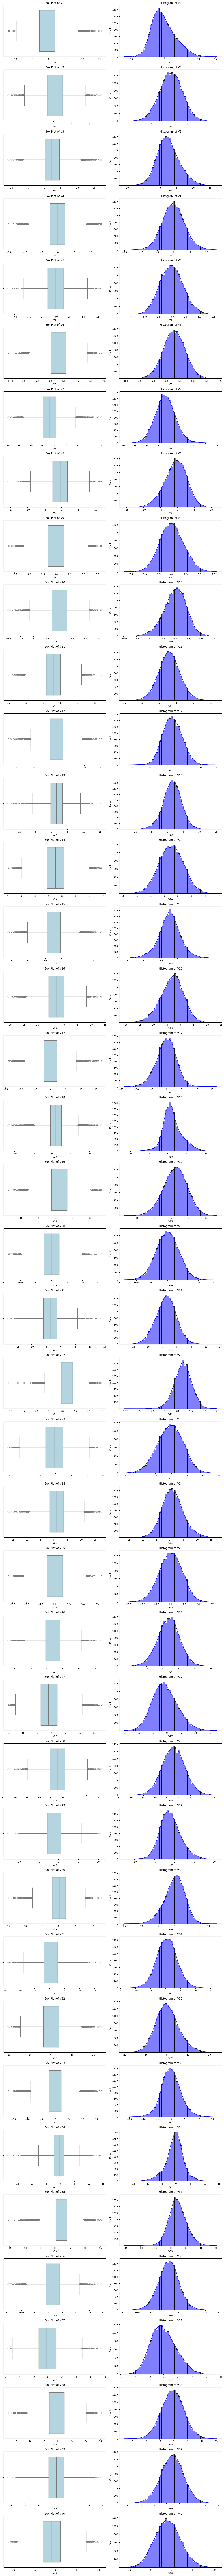

In [13]:
# select the first 40 columns as numerical columns
num_cols = data.iloc[:, 0:40].columns

# Set the figure size
plt.figure(figsize=(14, len(num_cols) * 4))  # Adjust height dynamically

# Loop through all 40 variables and plot
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, 2*i + 1)  # Box plot
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Box Plot of {col}')

    plt.subplot(len(num_cols), 2, 2*i + 2)  # Histogram
    sns.histplot(data[col], bins=50, kde=True, color='blue')
    plt.title(f'Histogram of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- There are positive and negative outliers for all attributes "V1" to "V40".
- Though the distribution of some these attributes is a little skewed, they are approximately normally distributed.
- Since not much is known about the attributes, the outliers will not be treated and are assumed to be real data trends.

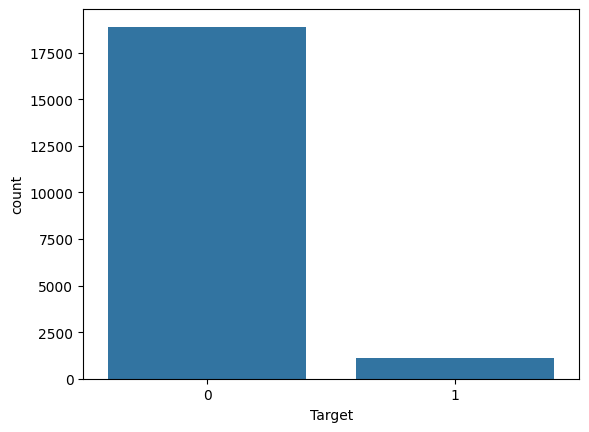

In [ ]:
sns.countplot(x=data["Target"].astype('category'));

In [ ]:
target_counts = data["Target"].value_counts()
target_percent = data["Target"].value_counts(normalize=True) * 100

# Combine into a DataFrame
summary = pd.DataFrame({"Count": target_counts, "Percentage": target_percent})
print(summary)

        Count  Percentage
Target                   
0       18890       94.45
1        1110        5.55


- The dataset is clearly imbalanced as ~94% of the classes are 0 (No failure) and only ~6% of the classes are 1 (failure) in the 'Target' variable.

### Bivariate Analysis

- Since the scaling is already done, it is not much useful to visualize the pairplots.
- If linear scaling is applied, the correlation values remain same. So, we will see the correlation matrix.

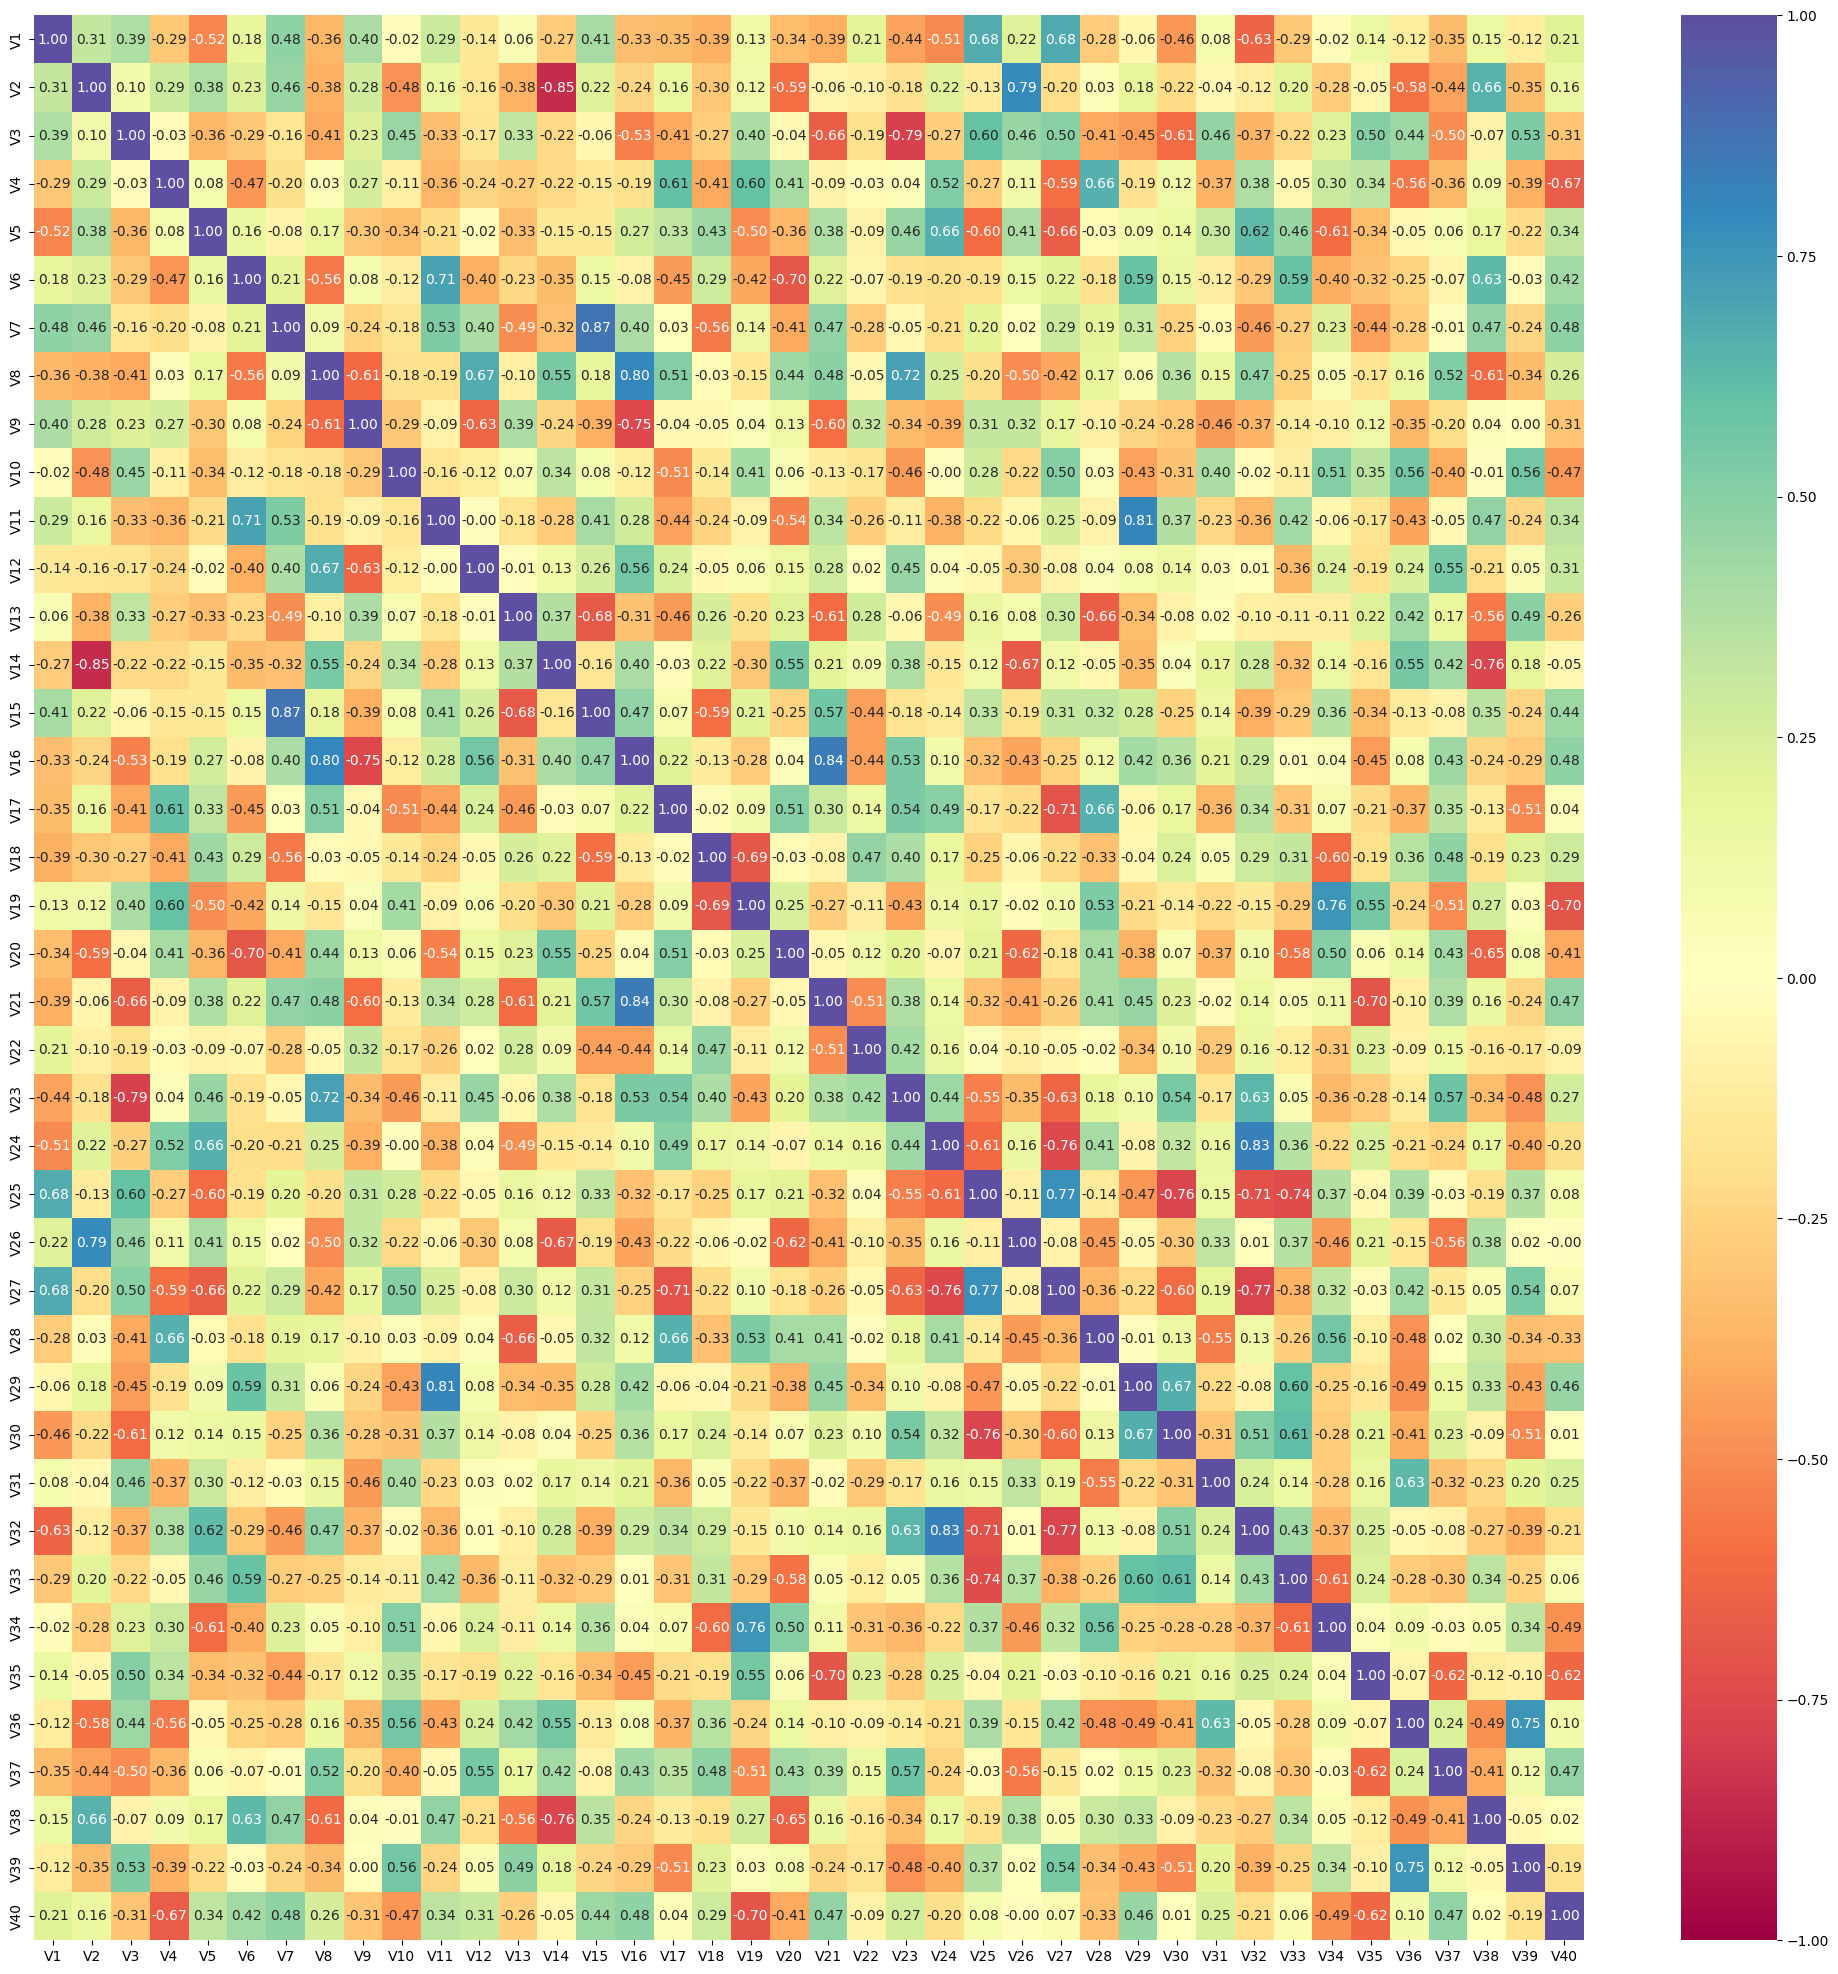

In [22]:
# Create a heatmap to show the correlation between numerical variables
plt.figure(figsize=(25, 25))
sns.heatmap(data[num_cols].corr(), vmin=-1, fmt='.2f', annot=True, cmap='Spectral');

- While the correlation between most of the variables is negligible, some variables have strong postive and some have strong negative correlation.

## Data Pre processing

In [14]:
# Dividing data into X and y

X = data.drop(["Target"], axis=1)
y = data["Target"]

X_test = data_test.drop(["Target"], axis=1)   ## drop target variable from test data
y_test = data_test["Target"]                  ## store target variable in y_test

In [15]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42) ##  split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


- We now have 15000 training examples, 5000 validations records and 5000 records for testing.

### Missing-value treatment

We will use median to impute missing values in "V1" and "V2" columns. Median is still a better option than Mean for imputing though the data is approximately Normally distributed since the distribution is a little skewed for V2.

In [17]:
imputer = SimpleImputer(strategy="median")

# 'Fit and Transform' only the training data to avoid data leakage
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val =  pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)     ## impute missing values in X_val

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)    ## impute missing values in X_test

In [18]:
# Checking that no column has missing values in train, validation or test sets

pd.DataFrame({'X_train': X_train.isna().sum(), 'X_val': X_val.isna().sum(), 'X_test': X_test.isna().sum()})

X_train  X_val  X_test
V1         0      0       0
V2         0      0       0
V3         0      0       0
V4         0      0       0
V5         0      0       0
V6         0      0       0
V7         0      0       0
V8         0      0       0
V9         0      0       0
V10        0      0       0
V11        0      0       0
V12        0      0       0
V13        0      0       0
V14        0      0       0
V15        0      0       0
V16        0      0       0
V17        0      0       0
V18        0      0       0
V19        0      0       0
V20        0      0       0
V21        0      0       0
V22        0      0       0
V23        0      0       0
V24        0      0       0
V25        0      0       0
V26        0      0       0
V27        0      0       0
V28        0      0       0
V29        0      0       0
V30        0      0       0
V31        0      0       0
V32        0      0       0
V33        0      0       0
V34        0      0       0
V35        0      0       0
V36        0      0       0
V37        0      0       0
V38        0      0       0
V39        0      0       0
V40        0      0       0

- Now, there are no missing values in our train, validation or the test data.
- Since the dataset is imbalanced, we will use oversampling(as the records are less) to balance the classes in the output varible.

### Oversampling

In [19]:
print('Number of different classes in the output variable before sampling:')
pd.DataFrame({'y_train': y_train.value_counts(), 'y_val': y_val.value_counts()})

Number of different classes in the output variable before sampling:


y_train  y_val
Target                
0         14167   4723
1           833    277

In [20]:
# Synthetic Minority Over Sampling Technique
smote = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [21]:
print('Number of different classes in the output variable after sampling:\n')
pd.DataFrame({'y_train': y_train.value_counts(), 'y_val': y_val.value_counts()})

Number of different classes in the output variable after sampling:



y_train  y_val
Target                
0         14167   4723
1         14167    277

- Now we have 14167 examples which are of class 0 and 14167 examples which belong to class 1 in our training set.

### Model evaluation criterion

3 types of cost are associated with the provided problem

   - Replacement cost - False Negatives - Predicting no failure, while there will be a failure
   - Inspection cost - False Positives - Predicting failure, while there is no failure
   - Repair cost - True Positives - Predicting failure correctly  

As given in the problem statement, since 'cost_of_replacement > cost_of_repair > cost_of_inspection', we want to prioritize minimizing 'False Negatives' (not predecting a defect when there is one) and maximizing 'True Positives' (predecting a defect if there is one) to reduce the cost_of_replacement. So, Recall is the main evaluation metric.  
We also want to minimize 'False Positives' to reduce the cost_of_inspection.

### Utility functions

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrices(model, X_train, y_train, X_val, y_val):
    # Get model predictions for training and validation sets
    y_pred_train = (model.predict(X_train) >= 0.5).astype(int).reshape(-1)
    y_pred_val = (model.predict(X_val) >= 0.5).astype(int).reshape(-1)

    # Compute confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_val = confusion_matrix(y_val, y_pred_val)

    # Create subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Titles for subplots
    titles = ['Training Confusion Matrix', 'Validation Confusion Matrix']

    # Loop through subplots to plot both confusion matrices
    for ax, cm, title in zip(axes, [cm_train, cm_val], titles):
        sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=ax)
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")
        ax.set_title(title)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
def plot(history, loss, recall):
    """
    Function to plot loss/accuracy graphs.

    history: an object which stores the metrics and losses..
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create 1 row, 2 columns of subplots

    # Plot the first metric (loss)
    axes[0].plot(history.history[loss])
    axes[0].plot(history.history['val_' + loss])
    axes[0].set_title('Model ' + loss.capitalize())
    axes[0].set_ylabel(loss.capitalize())
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Validation'], loc='upper right')

    # Plot the second metric (recall)
    axes[1].plot(history.history[recall])
    axes[1].plot(history.history['val_' + recall])
    axes[1].set_title('Model ' + recall.capitalize())
    axes[1].set_ylabel(recall.capitalize())
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout() # Improves subplot spacing
    plt.show() # Display the plot

We'll create a dataframe to store the results from all the models we build

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers", "# neurons - hidden layer", "activation function - hidden layer", "# epochs", "batch size", "validation loss",
            "validation accuracy", "validation precision",  "validation recall", "optimizer", "class weights", "dropout","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns).apply(lambda col: col.astype(object))

In [ ]:
results

Empty DataFrame
Columns: [# hidden layers, # neurons - hidden layer, activation function - hidden layer, # epochs, batch size, validation loss, validation accuracy, validation precision, validation recall, optimizer, class weights, dropout, time (secs)]
Index: []

## Model Building

### Model 0

- Let's start with a baseline model having an input layer, an output layer, and no hidden layers.
- We'll use Vanilla Gradient Descent as the optimizer.
- We'll set epochs to 10, which means the model will pass over the entire data 10 times

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# initializing the neural network
model_0 = Sequential()

# Adding a dense layer with softmax activation function, with the input dimension determined by the shape of the training data.
model_0.add(Dense(1, activation = 'sigmoid', input_dim = X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))

In [ ]:
#Printing the summary.
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

- `Output shape: (None, 1)`: The number of neurons in the output layer is 1
- `Param #: 41`: 40 weights associated with the input plus one bias parameter.

In [ ]:
#Compiling the model.
model_0.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()

# Training
history = model_0.fit(X_train, y_train, epochs=10, batch_size=X_train.shape[0], validation_data=(X_val, y_val))

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4860 - loss: 2.6504 - precision: 0.4799 - recall: 0.3339 - val_accuracy: 0.6274 - val_loss: 1.8405 - val_precision: 0.0484 - val_recall: 0.3069
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4916 - loss: 2.5148 - precision: 0.4879 - recall: 0.3387 - val_accuracy: 0.6364 - val_loss: 1.7452 - val_precision: 0.0513 - val_recall: 0.3177
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.4995 - loss: 2.3856 - precision: 0.4993 - recall: 0.3459 - val_accuracy: 0.6432 - val_loss: 1.6553 - val_precision: 0.0539 - val_recall: 0.3285
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5065 - loss: 2.2626 - precision: 0.5095 - recall: 0.3514 - val_accuracy: 0.6514 - val_loss: 1.5707 - val_precision: 0.0584 - val_recall: 0.3502
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5125 - loss: 2.1458 - precision: 0.5180 - recall: 0.3580 - val_accuracy: 0.6590 - val_loss: 1.4914 - val_pre

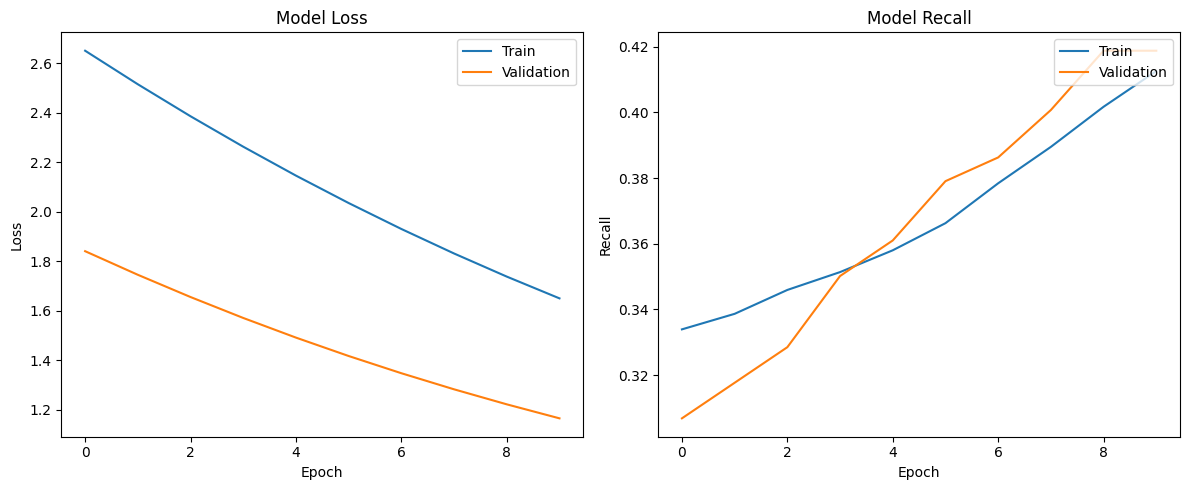

In [ ]:
plot(history, 'loss', 'recall')

- The Train and Validation loss are decreasing and they are liner with some curvature.
- The recall on the train and valdation set keeps increasing. After 3 epochs, the model has better recall on validation data than the train data.

In [ ]:
results.loc[0] = [0, '-', '-', 10, 28334, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start,2)]


results

# hidden layers # neurons - hidden layer  \
0                0                        -   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   

   validation accuracy  validation precision  validation recall optimizer  \
0                0.695              0.078378           0.418773         -   

  class weights dropout  time (secs)  
0             -       -         2.14

- We will gauge the model based on its performance on the validation data. So, the comments will be with respect to the validation data and not the training data.

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


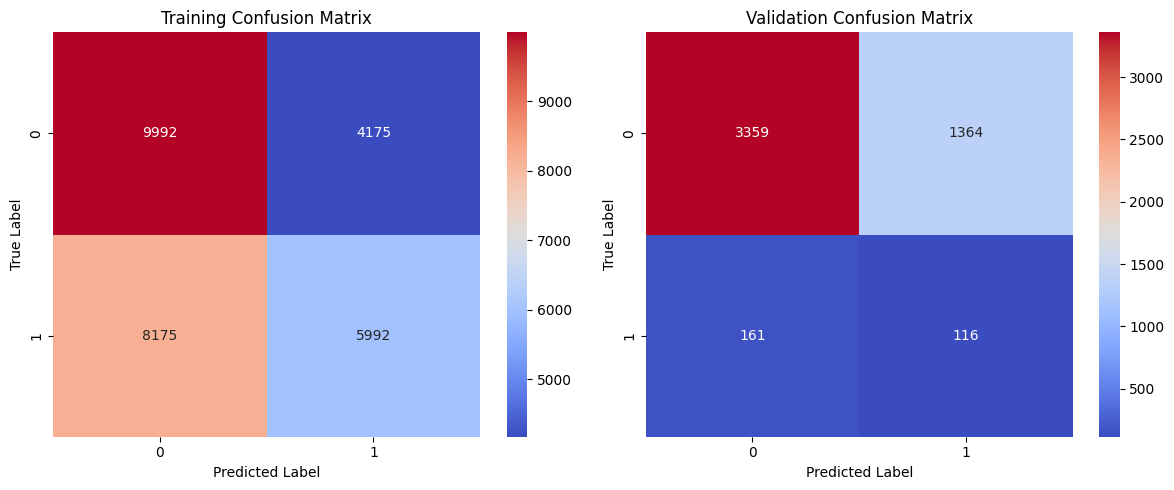

In [ ]:
# Call the function
plot_confusion_matrices(model_0, X_train, y_train, X_val, y_val)

- With the vanilla gradient descent and a baseline model with 10 epochs, we are able to obtain a validation recall of ~42%, which is very low.
- In the validation data, out of 277 failures, the model was able to predict only 116.
- The precision of the model is ~8% which is very low: the model has predicted 1480 failures    only 190  failures.
- We will try by changing the batch size to 1.

### Model 1

Now we will build a model which uses pure Stochastic gradient descent.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_1 = Sequential()
model_1.add(Dense(1, activation='sigmoid', input_dim = X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))
model_1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_1.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/10
28334/28334 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.8230 - loss: 0.5334 - precision: 0.8322 - recall: 0.8142 - val_accuracy: 0.8836 - val_loss: 0.3006 - val_precision: 0.2891 - val_recall: 0.7545
Epoch 2/10
28334/28334 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.8266 - loss: 0.5203 - precision: 0.8292 - recall: 0.8282 - val_accuracy: 0.8836 - val_loss: 0.3006 - val_precision: 0.2891 - val_recall: 0.7545
Epoch 3/10
28334/28334 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.8266 - loss: 0.5203 - precision: 0.8292 - recall: 0.8282 - val_accuracy: 0.8836 - val_loss: 0.3006 - val_precision: 0.2891 - val_recall: 0.7545
Epoch 4/10
28334/28334 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.8266 - loss: 0.5203 - precision: 0.8292 - recall: 0.8282 - val_accuracy: 0.8836 - val_loss: 0.3006 - val_precision: 0.2891 - val_recall: 0.7545
Epoch 5/10
28334/28334 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - accuracy: 0.8267 - loss: 0.5203 - precision: 0.8293 - recall: 0.8282 - val_accura

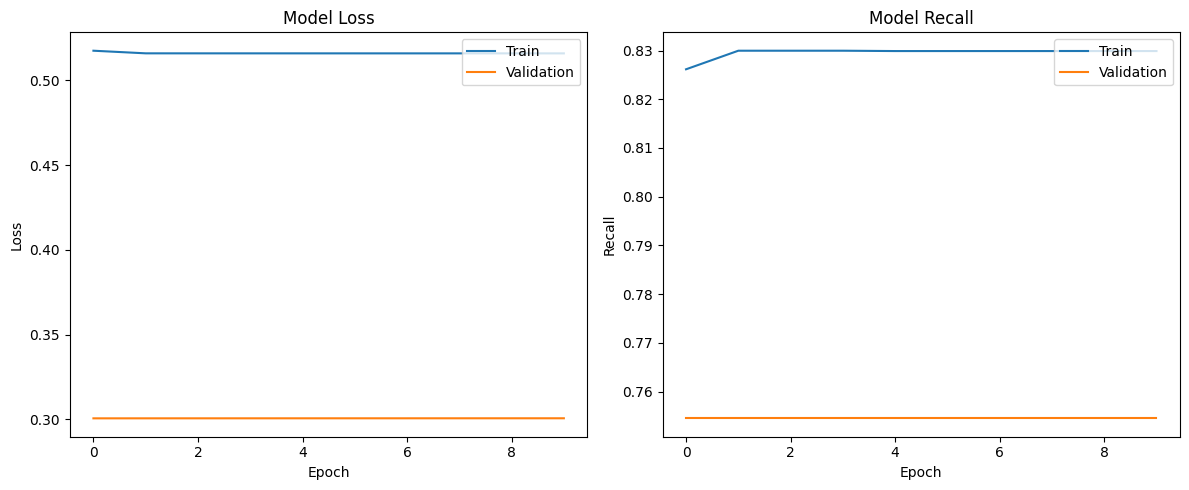

In [ ]:
plot(history, 'loss', 'recall')

- The loss and recall on both training and validation data are constant throughout the training because the model has converged fastly but we are using many steps: 28334(number of training samples)*10(epochs).

In [ ]:
results.loc[1] = [0, '-', '-', 10, 1, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results


# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32

- The loss has been reduced and the recall has increased significantly to 75% as there were higher number of steps involved in the gradient descent.
- The model also takes a lot of time to get trained because of more training steps involved.
- The model is also overfitting.

### Model 2

We will increase the batch size of the Stochastic gradient descent to 32.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_2 = Sequential()
model_2.add(Dense(1, activation = 'sigmoid', input_dim = X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))
model_2.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8172 - loss: 0.5426 - precision: 0.8432 - recall: 0.7804 - val_accuracy: 0.8986 - val_loss: 0.2694 - val_precision: 0.3366 - val_recall: 0.8556
Epoch 2/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.3434 - precision: 0.8854 - recall: 0.8582 - val_accuracy: 0.8900 - val_loss: 0.2826 - val_precision: 0.3178 - val_recall: 0.8592
Epoch 3/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8702 - loss: 0.3411 - precision: 0.8779 - recall: 0.8639 - val_accuracy: 0.8844 - val_loss: 0.2905 - val_precision: 0.3068 - val_recall: 0.8628
Epoch 4/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8708 - loss: 0.3403 - precision: 0.8753 - recall: 0.8686 - val_accuracy: 0.8822 - val_loss: 0.2952 - val_precision: 0.3030 - val_recall: 0.8664
Epoch 5/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.3400 - precision: 0.8732 - recall: 0.8702 - val_accuracy: 0.8798 - val_loss: 0.

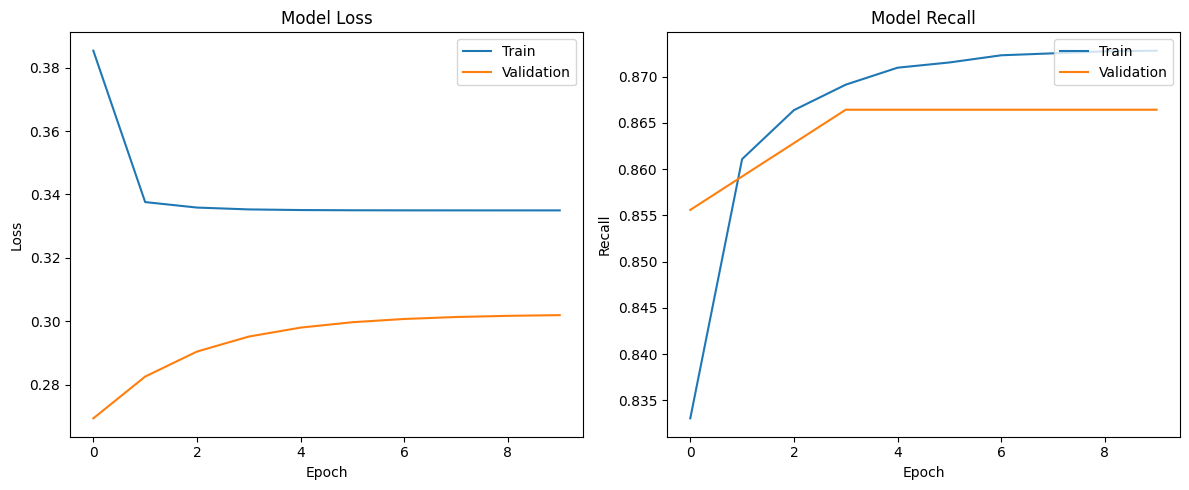

In [ ]:
plot(history, 'loss', 'recall')

- The plots for loss and recall have flattened out. So, increasing the epochs further won't help in getting a better model.

In [ ]:
results.loc[2] = [0, '-', '-', 10, 32, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   
2                0                        -   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   
2                                  -        10          32         0.301953   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   
2               0.8762              0.291971           0.866426         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32  
2             -       -        24.12

- The recall has further increased to 86.6% , suggesting the model is converging smoothly and is doing better than the previous model with batch size 1.
- The model is also generalizing well, with the train and validation recall being approximately equal.
- The time taken is also significantly less than the pure stochastic gradient model. This is another advantage of this model than the previous one.
- We will now train a model by further increasing the batch size.

### Model 3

- We will further increase the batch size of the stochastic gradient descent to 64.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_3 = Sequential()
model_3.add(Dense(1, activation = 'sigmoid', input_dim = X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))
model_3.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_3.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7807 - loss: 0.6749 - precision: 0.8105 - recall: 0.7331 - val_accuracy: 0.8996 - val_loss: 0.2633 - val_precision: 0.3395 - val_recall: 0.8592
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.3448 - precision: 0.8896 - recall: 0.8522 - val_accuracy: 0.8938 - val_loss: 0.2718 - val_precision: 0.3265 - val_recall: 0.8628
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.3420 - precision: 0.8857 - recall: 0.8570 - val_accuracy: 0.8904 - val_loss: 0.2789 - val_precision: 0.3191 - val_recall: 0.8628
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8714 - loss: 0.3403 - precision: 0.8825 - recall: 0.8608 - val_accuracy: 0.8882 - val_loss: 0.2844 - val_precision: 0.3159 - val_recall: 0.8736
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.3393 - precision: 0.8805 - recall: 0.8646 - val_accuracy: 0.8866 - val_loss: 0.

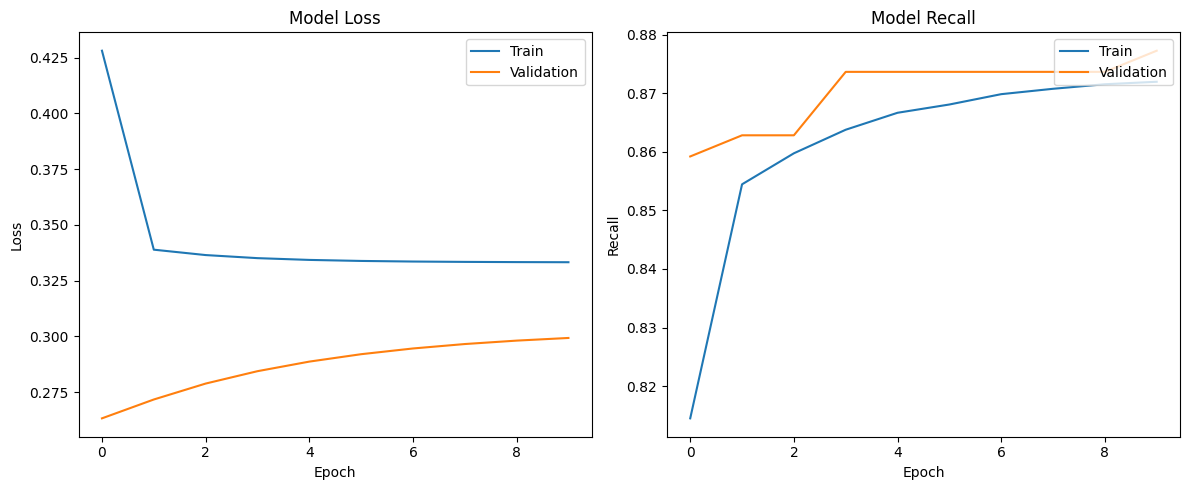

In [ ]:
plot(history, 'loss', 'recall')

- The plot for the recall has not clearly flattened out on both validation and training set.

In [ ]:
results.loc[3] = [0, '-', '-', 10, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   
2                0                        -   
3                0                        -   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   
2                                  -        10          32         0.301953   
3                                  -        10          64         0.299334   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   
2               0.8762              0.291971           0.866426         -   
3               0.8796              0.299630           0.877256         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32  
2             -       -        24.12  
3             -       -        12.19

- The model is performing a little better(recall of 87.7%) than the previous one with a batch size of 32 but the model training time has decreased by 50%.
- We will increase the number of epochs so that the model gets trained better.

### Model 4

- We will increase the number of epochs to 25.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_4 = Sequential()
model_4.add(Dense(1, activation = 'sigmoid', input_dim = X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))
model_4.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_4.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7807 - loss: 0.6749 - precision: 0.8105 - recall: 0.7331 - val_accuracy: 0.8996 - val_loss: 0.2633 - val_precision: 0.3395 - val_recall: 0.8592
Epoch 2/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.3448 - precision: 0.8896 - recall: 0.8522 - val_accuracy: 0.8938 - val_loss: 0.2718 - val_precision: 0.3265 - val_recall: 0.8628
Epoch 3/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.3420 - precision: 0.8857 - recall: 0.8570 - val_accuracy: 0.8904 - val_loss: 0.2789 - val_precision: 0.3191 - val_recall: 0.8628
Epoch 4/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8714 - loss: 0.3403 - precision: 0.8825 - recall: 0.8608 - val_accuracy: 0.8882 - val_loss: 0.2844 - val_precision: 0.3159 - val_recall: 0.8736
Epoch 5/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.3393 - precision: 0.8805 - recall: 0.8646 - val_accuracy: 0.8866 - val_loss: 0.

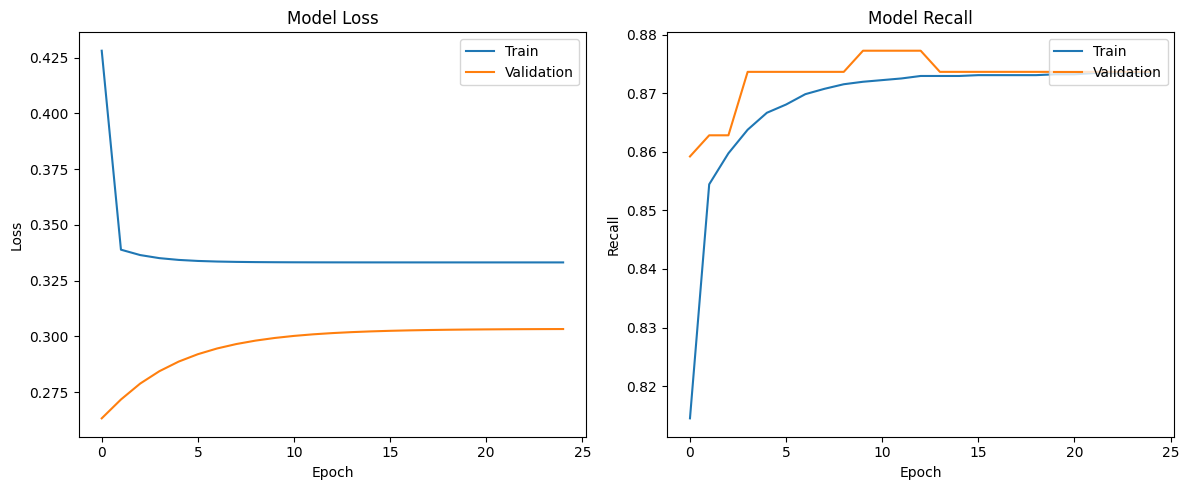

In [ ]:
plot(history, 'loss', 'recall')

- The graphs for the recall has flattened out at ~20 epochs.
- Increasing the epochs further will not give a better model. Rather, we can decrease the number of epochs to 20.

In [ ]:
results.loc[4] = [0, '-', '-', 25, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   
2                0                        -   
3                0                        -   
4                0                        -   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   
2                                  -        10          32         0.301953   
3                                  -        10          64         0.299334   
4                                  -        25          64         0.303334   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   
2               0.8762              0.291971           0.866426         -   
3               0.8796              0.299630           0.877256         -   
4               0.8776              0.295482           0.873646         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32  
2             -       -        24.12  
3             -       -        12.19  
4             -       -        25.48

- By increasing the number of epochs to 25, the recall has not increased. Instead, the validation recall has even decreased by 0.35%% to 87.36%. We will decrease the epochs to 20 as the model finishes learning early.
- The training time has increased significantly by nearly 3 times.
- We will now add a hidden layer to further improve our model.

### Model 5

Add a hidden layer with 6 neurons(randomly chosen with a little consideration to the number of output neurons-1 and the number of input neurons-40).

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_5 = Sequential()
model_5.add(Dense(6, activation = 'sigmoid', input_dim=X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))
model_5.add(Dense(1, activation = 'sigmoid'))
model_5.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_5.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5838 - loss: 0.6949 - precision: 0.6439 - recall: 0.3858 - val_accuracy: 0.8056 - val_loss: 0.5170 - val_precision: 0.1719 - val_recall: 0.6570
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7727 - loss: 0.5299 - precision: 0.8086 - recall: 0.7224 - val_accuracy: 0.8512 - val_loss: 0.4185 - val_precision: 0.2325 - val_recall: 0.7329
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8196 - loss: 0.4429 - precision: 0.8530 - recall: 0.7779 - val_accuracy: 0.8794 - val_loss: 0.3602 - val_precision: 0.2926 - val_recall: 0.8303
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8552 - loss: 0.3867 - precision: 0.8793 - recall: 0.8277 - val_accuracy: 0.8932 - val_loss: 0.3234 - val_precision: 0.3271 - val_recall: 0.8773
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8700 - loss: 0.3514 - precision: 0.8894 - recall: 0.8488 - val_accuracy: 0.9006 - val_loss: 0.

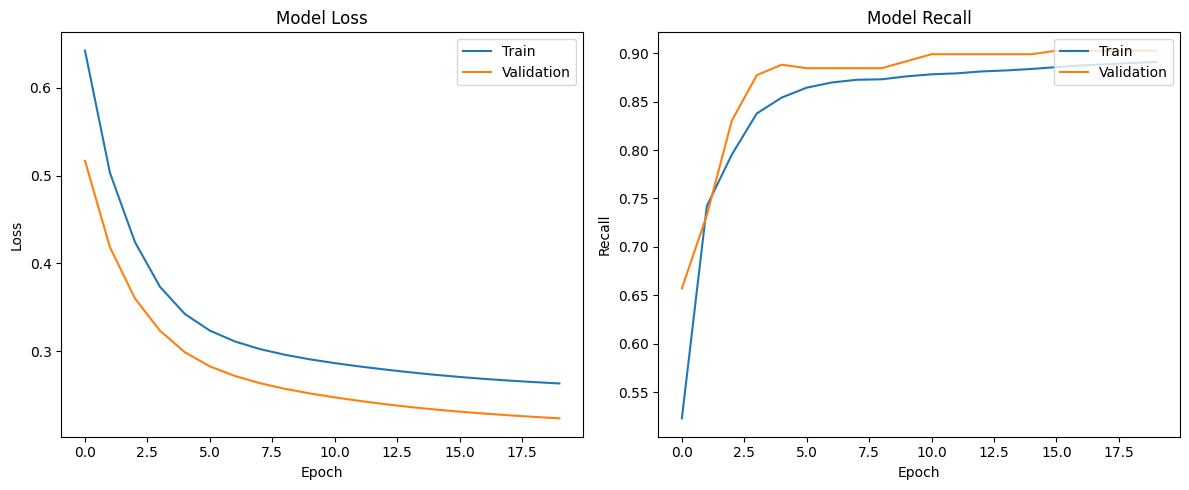

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[5] = [1, 6, 'sigmoid', 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   
2                0                        -   
3                0                        -   
4                0                        -   
5                1                        6   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   
2                                  -        10          32         0.301953   
3                                  -        10          64         0.299334   
4                                  -        25          64         0.303334   
5                            sigmoid        20          64         0.223517   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   
2               0.8762              0.291971           0.866426         -   
3               0.8796              0.299630           0.877256         -   
4               0.8776              0.295482           0.873646         -   
5               0.9262              0.422297           0.902527         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32  
2             -       -        24.12  
3             -       -        12.19  
4             -       -        25.48  
5             -       -        23.08

- With the added hidden layer, the loss has decreased significantly. The model recall has increased by ~3% with and 5 seconds decrease in the time. This is a good improvement.
- We will increase the number of neurons in the hidden layer and evaluate it.

### Model 6

Increase the hidden layer neurons to 12

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_6 = Sequential()
model_6.add(Dense(12,activation='sigmoid',input_dim = X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))
model_6.add(Dense(1, activation = 'sigmoid'))
model_6.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             492 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505 (1.97 KB)

 Trainable params: 505 (1.97 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model_6.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7133 - loss: 0.5851 - precision: 0.6829 - recall: 0.8626 - val_accuracy: 0.8698 - val_loss: 0.3828 - val_precision: 0.2752 - val_recall: 0.8267
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 0.3913 - precision: 0.8695 - recall: 0.8325 - val_accuracy: 0.8900 - val_loss: 0.3232 - val_precision: 0.3202 - val_recall: 0.8773
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3439 - precision: 0.8865 - recall: 0.8536 - val_accuracy: 0.8990 - val_loss: 0.2929 - val_precision: 0.3417 - val_recall: 0.8881
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.3225 - precision: 0.8925 - recall: 0.8611 - val_accuracy: 0.9022 - val_loss: 0.2760 - val_precision: 0.3494 - val_recall: 0.8881
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.3101 - precision: 0.8951 - recall: 0.8672 - val_accuracy: 0.9058 - val_loss: 0.

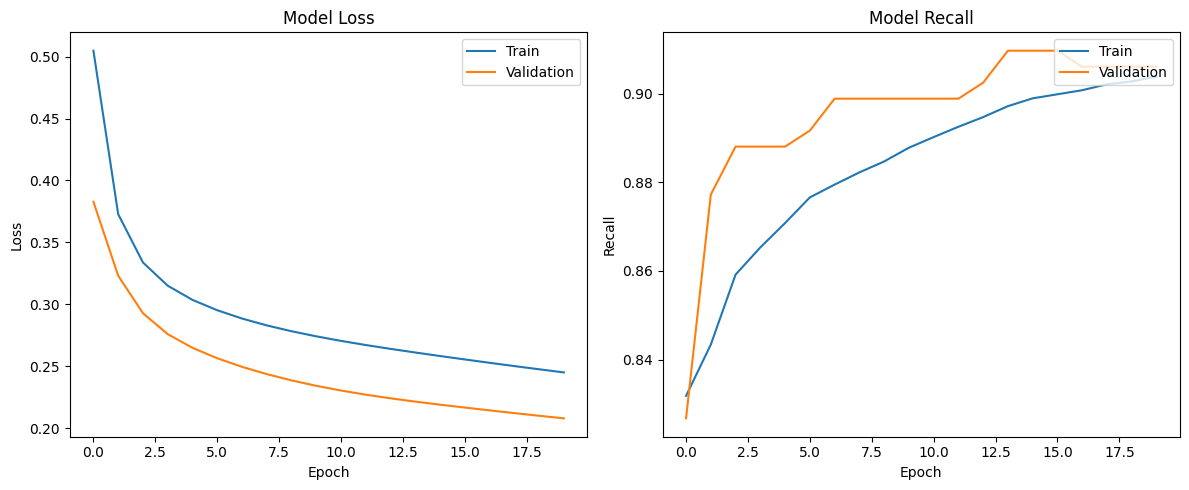

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[6] = [1, 12, 'sigmoid', 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   
2                0                        -   
3                0                        -   
4                0                        -   
5                1                        6   
6                1                       12   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   
2                                  -        10          32         0.301953   
3                                  -        10          64         0.299334   
4                                  -        25          64         0.303334   
5                            sigmoid        20          64         0.223517   
6                            sigmoid        20          64         0.207986   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   
2               0.8762              0.291971           0.866426         -   
3               0.8796              0.299630           0.877256         -   
4               0.8776              0.295482           0.873646         -   
5               0.9262              0.422297           0.902527         -   
6               0.9330              0.448214           0.906137         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32  
2             -       -        24.12  
3             -       -        12.19  
4             -       -        25.48  
5             -       -        23.08  
6             -       -        23.05

- Increasing the hidden layer neurons has slightly improved our model performance: the loss has been reduced by to 0.208, the validation recall is now 90.61%. The validation precision has increased by ~2% to 44.8%.
- We will further increase the number of neurons in the hidden layer hoping for an improvement in the precision.

### Model 7

Stochastic gradient descent with 24 hidden layer neurons.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_7 = Sequential()
model_7.add(Dense(24,activation='sigmoid',input_dim = X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))
model_7.add(Dense(1, activation = 'sigmoid'))
model_7.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_7.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6956 - loss: 0.6019 - precision: 0.6603 - recall: 0.8923 - val_accuracy: 0.8614 - val_loss: 0.3813 - val_precision: 0.2673 - val_recall: 0.8628
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8547 - loss: 0.3797 - precision: 0.8648 - recall: 0.8453 - val_accuracy: 0.8894 - val_loss: 0.3115 - val_precision: 0.3198 - val_recall: 0.8845
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8752 - loss: 0.3316 - precision: 0.8845 - recall: 0.8668 - val_accuracy: 0.9000 - val_loss: 0.2808 - val_precision: 0.3449 - val_recall: 0.8953
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.3113 - precision: 0.8943 - recall: 0.8740 - val_accuracy: 0.9036 - val_loss: 0.2650 - val_precision: 0.3538 - val_recall: 0.8953
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8885 - loss: 0.3000 - precision: 0.8999 - recall: 0.8774 - val_accuracy: 0.9082 - val_loss: 0.

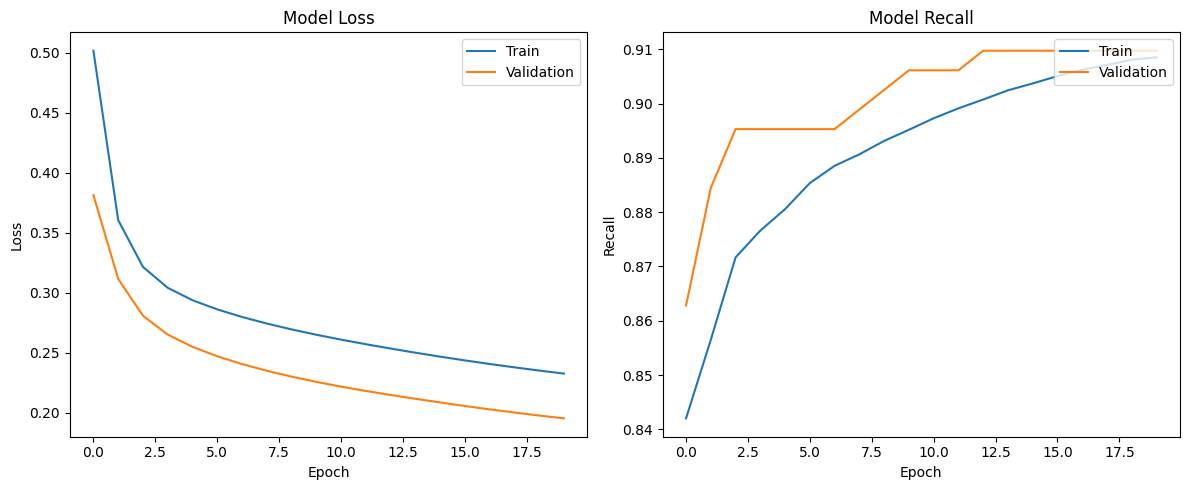

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[7] = [1, 24, 'sigmoid', 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   
2                0                        -   
3                0                        -   
4                0                        -   
5                1                        6   
6                1                       12   
7                1                       24   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   
2                                  -        10          32         0.301953   
3                                  -        10          64         0.299334   
4                                  -        25          64         0.303334   
5                            sigmoid        20          64         0.223517   
6                            sigmoid        20          64         0.207986   
7                            sigmoid        20          64         0.195188   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   
2               0.8762              0.291971           0.866426         -   
3               0.8796              0.299630           0.877256         -   
4               0.8776              0.295482           0.873646         -   
5               0.9262              0.422297           0.902527         -   
6               0.9330              0.448214           0.906137         -   
7               0.9432              0.493151           0.909747         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32  
2             -       -        24.12  
3             -       -        12.19  
4             -       -        25.48  
5             -       -        23.08  
6             -       -        23.05  
7             -       -        23.54

- Increasing the number of neurons to 24 has only slightly improved the model performance.
- The recall is almost the smae. The precision is 0.493 and the loss has gone down to 0.195.
- We will use 12 neurons in the first hidden layer for now and check with other variations.
- We will try a different activation function now.

### Model 8

Stochastic gradient descent with ReLu activation function.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_8 = Sequential()
model_8.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_8.add(Dense(1, activation = 'sigmoid'))
model_8.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_8.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7784 - loss: 0.5630 - precision: 0.7916 - recall: 0.7571 - val_accuracy: 0.9264 - val_loss: 0.2330 - val_precision: 0.4203 - val_recall: 0.8664
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9114 - loss: 0.2677 - precision: 0.9310 - recall: 0.8910 - val_accuracy: 0.9470 - val_loss: 0.1979 - val_precision: 0.5126 - val_recall: 0.8845
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9238 - loss: 0.2378 - precision: 0.9464 - recall: 0.9005 - val_accuracy: 0.9580 - val_loss: 0.1762 - val_precision: 0.5774 - val_recall: 0.9025
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9307 - loss: 0.2183 - precision: 0.9565 - recall: 0.9044 - val_accuracy: 0.9656 - val_loss: 0.1602 - val_precision: 0.6336 - val_recall: 0.8989
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9352 - loss: 0.2045 - precision: 0.9617 - recall: 0.9083 - val_accuracy: 0.9690 - val_loss: 0.

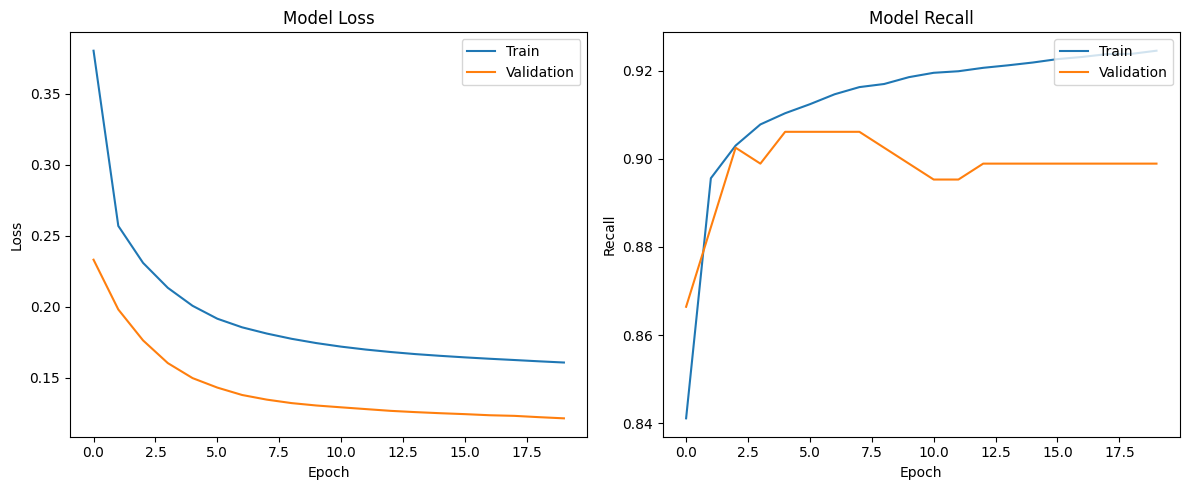

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[8] = [1, 12, 'relu', 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   
2                0                        -   
3                0                        -   
4                0                        -   
5                1                        6   
6                1                       12   
7                1                       24   
8                1                       12   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   
2                                  -        10          32         0.301953   
3                                  -        10          64         0.299334   
4                                  -        25          64         0.303334   
5                            sigmoid        20          64         0.223517   
6                            sigmoid        20          64         0.207986   
7                            sigmoid        20          64         0.195188   
8                               relu        20          64         0.121263   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   
2               0.8762              0.291971           0.866426         -   
3               0.8796              0.299630           0.877256         -   
4               0.8776              0.295482           0.873646         -   
5               0.9262              0.422297           0.902527         -   
6               0.9330              0.448214           0.906137         -   
7               0.9432              0.493151           0.909747         -   
8               0.9768              0.738872           0.898917         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32  
2             -       -        24.12  
3             -       -        12.19  
4             -       -        25.48  
5             -       -        23.08  
6             -       -        23.05  
7             -       -        23.54  
8             -       -        21.05

- With the relu activation function, though the model recall has not improved, the loss has decreased significantly and the precision has increased from 47% to 75%. This is a good improvement.
- The model training time has decreased by 8 secs.
- We will try the same model with tanh activation.

### Model 9

Training the model with tanh activation in the hidden layer.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_9 = Sequential()
model_9.add(Dense(12,activation='tanh',input_dim = X_train.shape[1], kernel_initializer=GlorotUniform(seed=812)))
model_9.add(Dense(1, activation = 'sigmoid'))
model_9.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_9.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6722 - loss: 0.5986 - precision: 0.7019 - recall: 0.6303 - val_accuracy: 0.9010 - val_loss: 0.2975 - val_precision: 0.3411 - val_recall: 0.8448
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3461 - precision: 0.8953 - recall: 0.8430 - val_accuracy: 0.9014 - val_loss: 0.2665 - val_precision: 0.3462 - val_recall: 0.8773
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.3157 - precision: 0.8950 - recall: 0.8685 - val_accuracy: 0.9038 - val_loss: 0.2535 - val_precision: 0.3534 - val_recall: 0.8881
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.3013 - precision: 0.8981 - recall: 0.8752 - val_accuracy: 0.9076 - val_loss: 0.2444 - val_precision: 0.3638 - val_recall: 0.8917
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8906 - loss: 0.2918 - precision: 0.9019 - recall: 0.8796 - val_accuracy: 0.9092 - val_loss: 0.

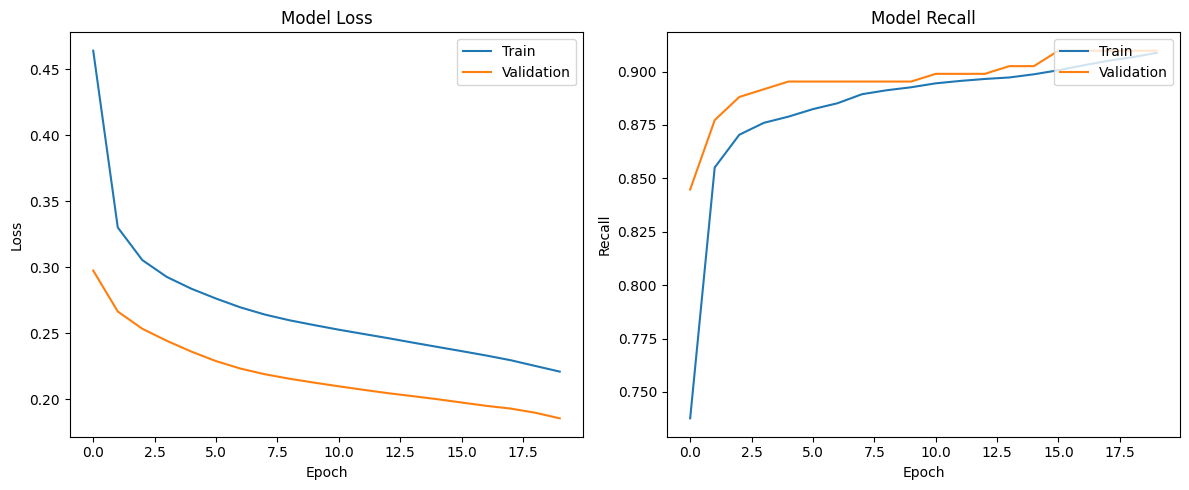

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[9] = [1, 12, 'tanh', 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                  history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                0                        -   
2                0                        -   
3                0                        -   
4                0                        -   
5                1                        6   
6                1                       12   
7                1                       24   
8                1                       12   
9                1                       12   

  activation function - hidden layer  # epochs  batch size  validation loss  \
0                                  -        10       28334         1.165204   
1                                  -        10           1         0.300628   
2                                  -        10          32         0.301953   
3                                  -        10          64         0.299334   
4                                  -        25          64         0.303334   
5                            sigmoid        20          64         0.223517   
6                            sigmoid        20          64         0.207986   
7                            sigmoid        20          64         0.195188   
8                               relu        20          64         0.121263   
9                               tanh        20          64         0.185709   

   validation accuracy  validation precision  validation recall optimizer  \
0               0.6950              0.078378           0.418773         -   
1               0.8836              0.289073           0.754513         -   
2               0.8762              0.291971           0.866426         -   
3               0.8796              0.299630           0.877256         -   
4               0.8776              0.295482           0.873646         -   
5               0.9262              0.422297           0.902527         -   
6               0.9330              0.448214           0.906137         -   
7               0.9432              0.493151           0.909747         -   
8               0.9768              0.738872           0.898917         -   
9               0.9450              0.501992           0.909747         -   

  class weights dropout  time (secs)  
0             -       -         2.14  
1             -       -       380.32  
2             -       -        24.12  
3             -       -        12.19  
4             -       -        25.48  
5             -       -        23.08  
6             -       -        23.05  
7             -       -        23.54  
8             -       -        21.05  
9             -       -        23.43

- Using Tanh has not improved our model performance.
- The model recall has remained constant but the precision has decreased by 24%.   
- Now, we will increase the number of hidden layers.

### Model 10

Add one more hidden layer: use relu and sigmoid activations.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_10 = Sequential()
model_10.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_10.add(Dense(6,activation='sigmoid', kernel_initializer=GlorotUniform(seed=812)))
model_10.add(Dense(1, activation = 'sigmoid'))
model_10.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_10.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7184 - loss: 0.5835 - precision: 0.6839 - recall: 0.8407 - val_accuracy: 0.8596 - val_loss: 0.4378 - val_precision: 0.2549 - val_recall: 0.7978
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 0.4037 - precision: 0.8697 - recall: 0.8518 - val_accuracy: 0.9036 - val_loss: 0.3416 - val_precision: 0.3529 - val_recall: 0.8881
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8915 - loss: 0.3322 - precision: 0.8997 - recall: 0.8841 - val_accuracy: 0.9178 - val_loss: 0.2864 - val_precision: 0.3947 - val_recall: 0.9061
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9058 - loss: 0.2909 - precision: 0.9170 - recall: 0.8949 - val_accuracy: 0.9284 - val_loss: 0.2502 - val_precision: 0.4305 - val_recall: 0.9061
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9135 - loss: 0.2661 - precision: 0.9308 - recall: 0.8958 - val_accuracy: 0.9366 - val_loss: 0.

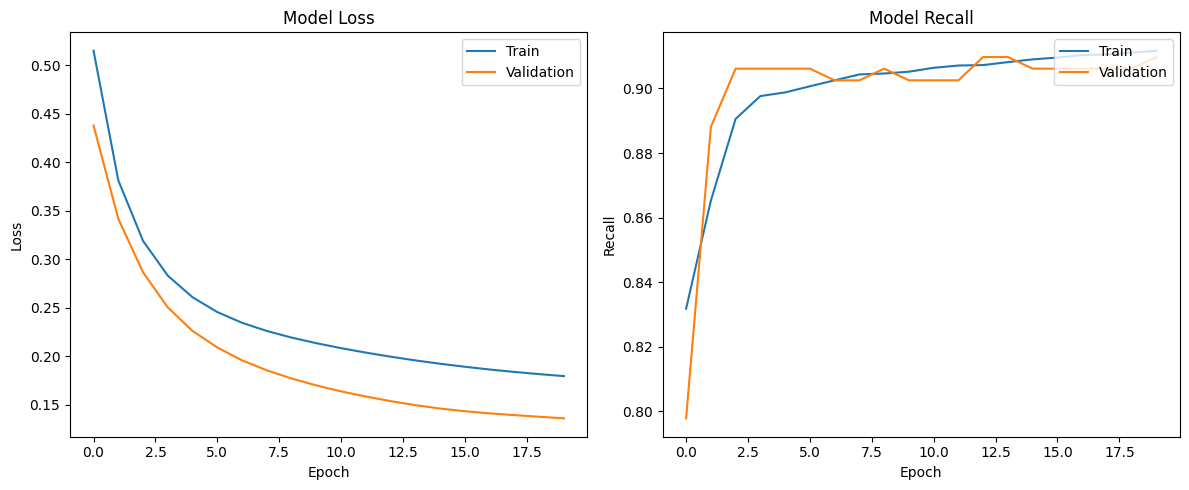

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[10] = [2, [12, 6], ['relu', 'sigmoid'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                   history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   

   class weights dropout  time (secs)  
0              -       -         2.14  
1              -       -       380.32  
2              -       -        24.12  
3              -       -        12.19  
4              -       -        25.48  
5              -       -        23.08  
6              -       -        23.05  
7              -       -        23.54  
8              -       -        21.05  
9              -       -        23.43  
10             -       -        22.50

- Using relu and sigmoid respectively in two hidden layers hasn't made much difference compared to the model_8 which used only relu: recall has increased by 0.2% but the precision has decreased by 1% and model loss has also increased.
- We will now use only relu as the activation in both the hidden layers.

### Model 11

Use ReLu as the activation function in both the hidden layers.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_11 = Sequential()
model_11.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_11.add(Dense(6, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_11.add(Dense(1, activation='sigmoid'))
model_11.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_11.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7508 - loss: 0.5570 - precision: 0.7626 - recall: 0.7403 - val_accuracy: 0.8978 - val_loss: 0.3047 - val_precision: 0.3333 - val_recall: 0.8448
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.3061 - precision: 0.9000 - recall: 0.8631 - val_accuracy: 0.9226 - val_loss: 0.2406 - val_precision: 0.4089 - val_recall: 0.8917
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9044 - loss: 0.2597 - precision: 0.9245 - recall: 0.8834 - val_accuracy: 0.9434 - val_loss: 0.2081 - val_precision: 0.4940 - val_recall: 0.8917
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9168 - loss: 0.2324 - precision: 0.9417 - recall: 0.8909 - val_accuracy: 0.9592 - val_loss: 0.1794 - val_precision: 0.5863 - val_recall: 0.8953
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9270 - loss: 0.2089 - precision: 0.9580 - recall: 0.8951 - val_accuracy: 0.9692 - val_loss: 0.

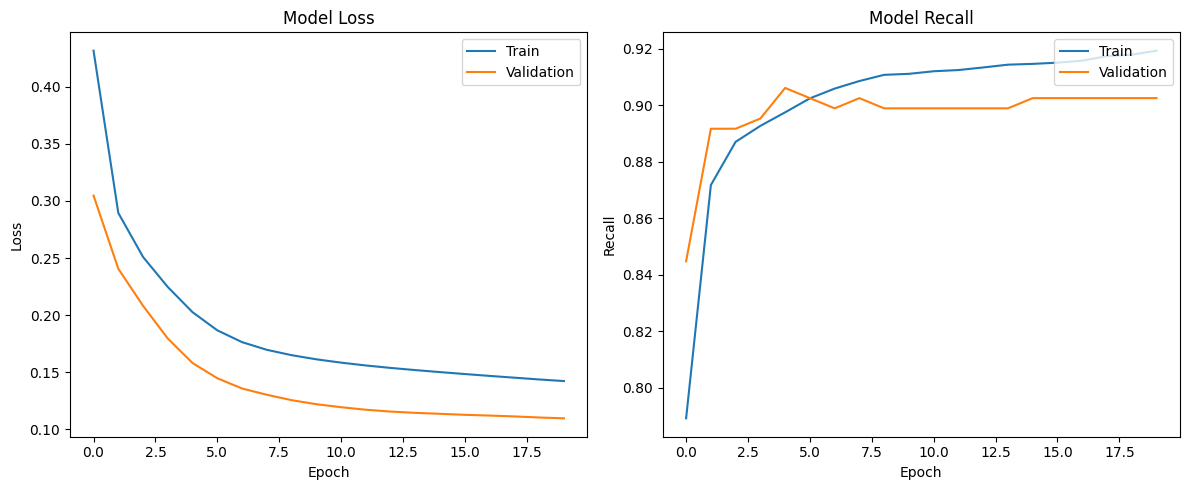

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[11] = [2, [12, 6], ['relu', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1], history.history["val_precision"][-1],
                   history.history["val_recall"][-1], '-', '-', '-', round(end-start, 2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   

   class weights dropout  time (secs)  
0              -       -         2.14  
1              -       -       380.32  
2              -       -        24.12  
3              -       -        12.19  
4              -       -        25.48  
5              -       -        23.08  
6              -       -        23.05  
7              -       -        23.54  
8              -       -        21.05  
9              -       -        23.43  
10             -       -        22.50  
11             -       -        22.43

- Using Relu in both the hidden layers has also not increased the model performance notably but it is slightly better than model_8 which uses one hidden layer of relu: there is a minute increase in recall, precision has not changed but the loss has slightly decreased from 0.1213 to 0.1148.
- We will now use tanh activation in the second layer to see if this increases the model performance.

### Model 12

Changing the activation to Tanh in the second hidden layer.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_12 = Sequential()
model_12.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_12.add(Dense(6, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_12.add(Dense(1, activation='sigmoid'))
model_12.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_12.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6892 - loss: 0.6470 - precision: 0.6880 - recall: 0.7270 - val_accuracy: 0.8900 - val_loss: 0.3373 - val_precision: 0.3153 - val_recall: 0.8412
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8883 - loss: 0.3446 - precision: 0.9050 - recall: 0.8709 - val_accuracy: 0.9294 - val_loss: 0.2256 - val_precision: 0.4326 - val_recall: 0.8809
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9136 - loss: 0.2701 - precision: 0.9307 - recall: 0.8961 - val_accuracy: 0.9402 - val_loss: 0.1907 - val_precision: 0.4787 - val_recall: 0.8917
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9228 - loss: 0.2427 - precision: 0.9419 - recall: 0.9034 - val_accuracy: 0.9504 - val_loss: 0.1714 - val_precision: 0.5310 - val_recall: 0.8953
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.2259 - precision: 0.9516 - recall: 0.9056 - val_accuracy: 0.9612 - val_loss: 0.

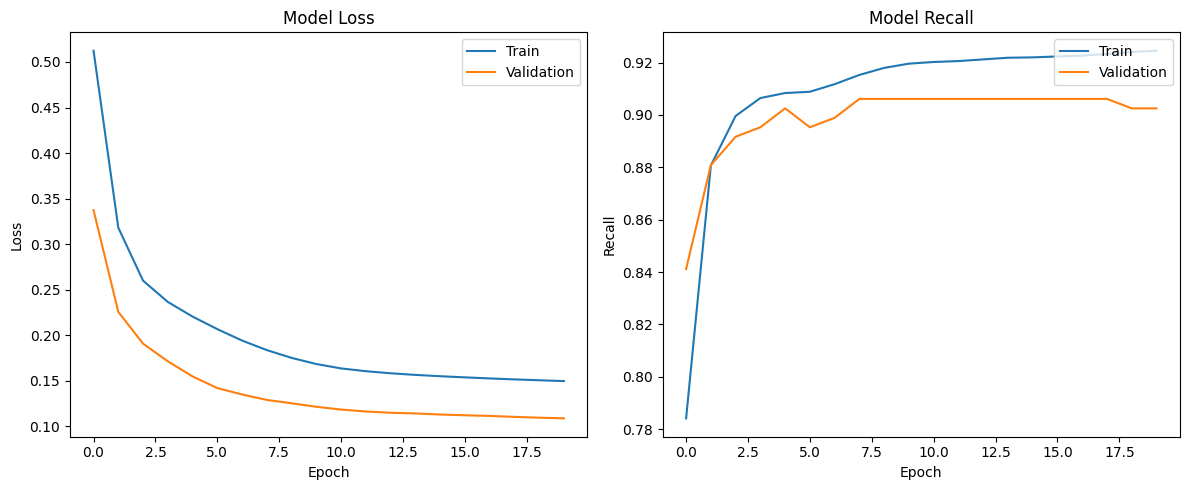

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[12] = [2, [12, 6], ['relu', 'tanh'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], '-', '-', '-', round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   

   class weights dropout  time (secs)  
0              -       -         2.14  
1              -       -       380.32  
2              -       -        24.12  
3              -       -        12.19  
4              -       -        25.48  
5              -       -        23.08  
6              -       -        23.05  
7              -       -        23.54  
8              -       -        21.05  
9              -       -        23.43  
10             -       -        22.50  
11             -       -        22.43  
12             -       -        22.45

- Using Relu in the first hidden layer and tanh in the second layer has increased the performance of the model slightly: the recall is the same, the loss has decreased by some amount and the precision has increased from to 77.64%.
- We will now try increasing the neurons in the second hidden layer.

### Model 13

Increase the number of neurons in the second hidden layer to 12.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_13 = Sequential()
model_13.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_13.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_13.add(Dense(1, activation='sigmoid'))
model_13.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_13.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7700 - loss: 0.4844 - precision: 0.7982 - recall: 0.7291 - val_accuracy: 0.9054 - val_loss: 0.2759 - val_precision: 0.3542 - val_recall: 0.8592
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8890 - loss: 0.3058 - precision: 0.9063 - recall: 0.8709 - val_accuracy: 0.9264 - val_loss: 0.2283 - val_precision: 0.4209 - val_recall: 0.8736
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9069 - loss: 0.2677 - precision: 0.9269 - recall: 0.8862 - val_accuracy: 0.9376 - val_loss: 0.1997 - val_precision: 0.4667 - val_recall: 0.8845
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9190 - loss: 0.2418 - precision: 0.9405 - recall: 0.8968 - val_accuracy: 0.9504 - val_loss: 0.1765 - val_precision: 0.5310 - val_recall: 0.8953
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.2197 - precision: 0.9537 - recall: 0.9035 - val_accuracy: 0.9624 - val_loss: 0.

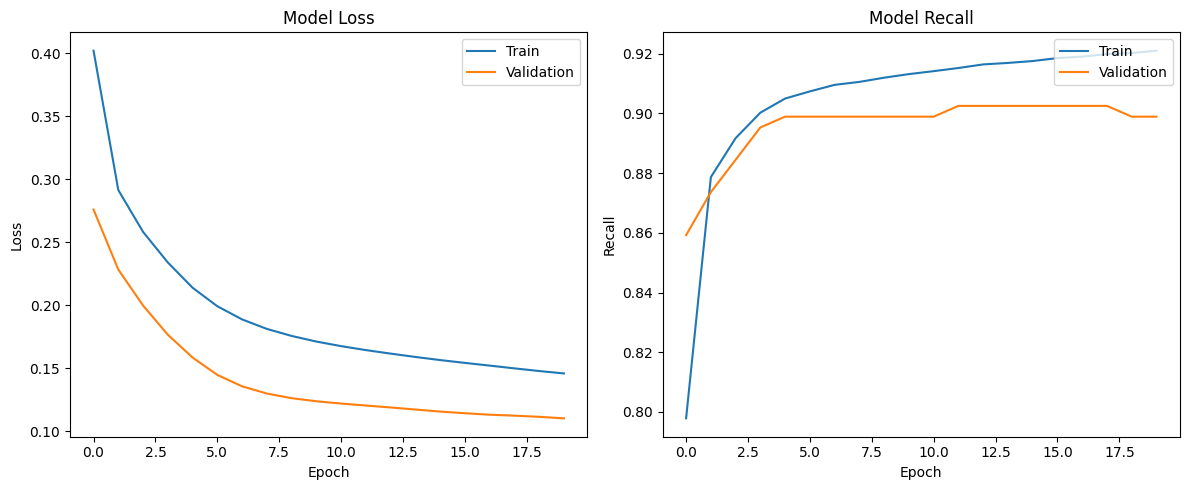

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[13] = [2, [12, 12], ['relu', 'tanh'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], '-', '-', '-', round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   
13               0.9796              0.770898           0.898917         -   

   class weights dropout  time (secs)  
0              -       -         2.14  
1              -       -       380.32  
2              -       -        24.12  
3              -       -        12.19  
4              -       -        25.48  
5              -       -        23.08  
6              -       -        23.05  
7              -       -        23.54  
8              -       -        21.05  
9              -       -        23.43  
10             -       -        22.50  
11             -       -        22.43  
12             -       -        22.45  
13             -       -        21.29

- This model has performed similar to the previous models:
  - The recall has is 89.9%.
  - Precision is 77.09%.
  - The loss has increased to 0.1102.
- We will now try further increasing the number of neurons in this layer.

### Model 14

Increase the neurons in the second layer to 24.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_14 = Sequential()
model_14.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_14.add(Dense(24, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_14.add(Dense(1, activation='sigmoid'))
model_14.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_14.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7556 - loss: 0.5042 - precision: 0.7296 - recall: 0.8552 - val_accuracy: 0.8982 - val_loss: 0.2665 - val_precision: 0.3393 - val_recall: 0.8845
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8970 - loss: 0.2812 - precision: 0.9061 - recall: 0.8887 - val_accuracy: 0.9280 - val_loss: 0.2119 - val_precision: 0.4273 - val_recall: 0.8809
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2409 - precision: 0.9351 - recall: 0.9013 - val_accuracy: 0.9474 - val_loss: 0.1850 - val_precision: 0.5146 - val_recall: 0.8917
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9270 - loss: 0.2194 - precision: 0.9493 - recall: 0.9041 - val_accuracy: 0.9542 - val_loss: 0.1667 - val_precision: 0.5536 - val_recall: 0.8953
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9334 - loss: 0.2038 - precision: 0.9589 - recall: 0.9075 - val_accuracy: 0.9620 - val_loss: 0.

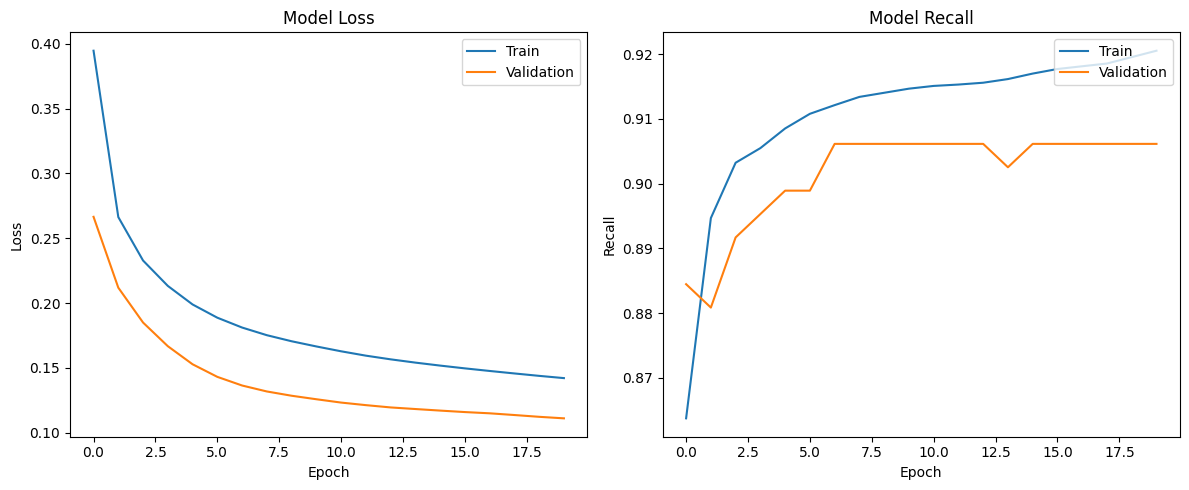

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[14] = [2, [12, 24], ['relu', 'tanh'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], '-', '-', '-', round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   
14                2                 [12, 24]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   
14                       [relu, tanh]        20          64         0.111105   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   
13               0.9796              0.770898           0.898917         -   
14               0.9786              0.756024           0.906137         -   

   class weights dropout  time (secs)  
0              -       -         2.14  
1              -       -       380.32  
2              -       -        24.12  
3              -       -        12.19  
4              -       -        25.48  
5              -       -        23.08  
6              -       -        23.05  
7              -       -        23.54  
8              -       -        21.05  
9              -       -        23.43  
10             -       -        22.50  
11             -       -        22.43  
12             -       -        22.45  
13             -       -        21.29  
14             -       -        22.01

- Increasing the number of neurons in the second hidden layer has not increased the model performance:
 - the loss has increased, recall is almost the same and the precision has decreased.
- We will now use different optimizer on model_13.

### Model 15

Using Adam Optimizer

In [31]:
tf.keras.backend.clear_session()

In [ ]:
model_15 = Sequential()
model_15.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_15.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_15.add(Dense(1, activation = 'sigmoid'))
model_15.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_15.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7629 - loss: 0.4752 - precision: 0.7676 - recall: 0.7808 - val_accuracy: 0.9588 - val_loss: 0.1667 - val_precision: 0.5860 - val_recall: 0.8736
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9332 - loss: 0.2024 - precision: 0.9642 - recall: 0.9015 - val_accuracy: 0.9786 - val_loss: 0.1198 - val_precision: 0.7576 - val_recall: 0.9025
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9472 - loss: 0.1679 - precision: 0.9784 - recall: 0.9160 - val_accuracy: 0.9788 - val_loss: 0.1097 - val_precision: 0.7583 - val_recall: 0.9061
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9511 - loss: 0.1553 - precision: 0.9820 - recall: 0.9203 - val_accuracy: 0.9808 - val_loss: 0.1047 - val_precision: 0.7837 - val_recall: 0.9025
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9531 - loss: 0.1476 - precision: 0.9823 - recall: 0.9241 - val_accuracy: 0.9818 - val_loss: 0.

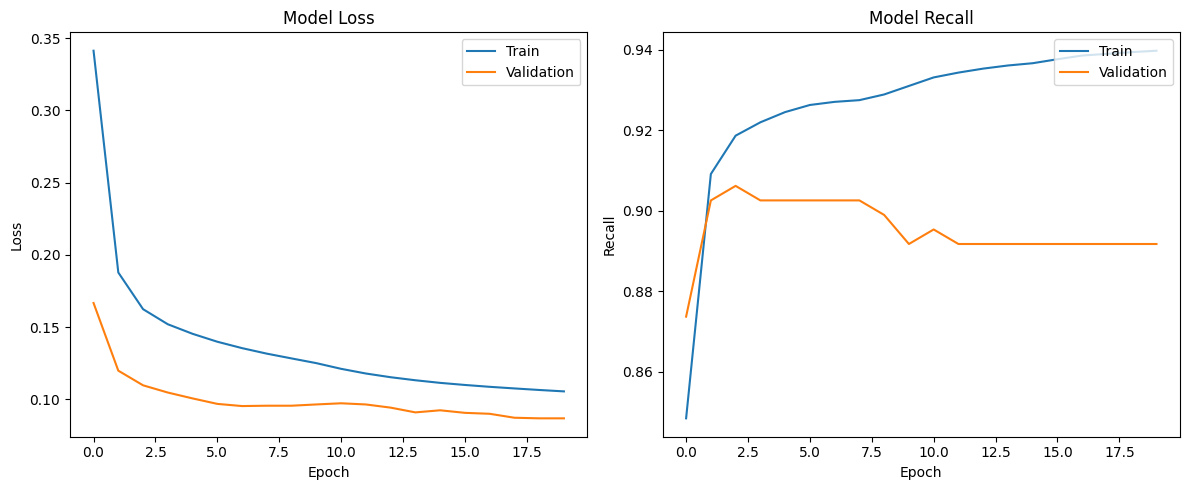

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[15] = [2, [12, 12], ['relu', 'tanh'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', '-', '-', round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   
14                2                 [12, 24]   
15                2                 [12, 12]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   
14                       [relu, tanh]        20          64         0.111105   
15                       [relu, tanh]        20          64         0.086846   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   
13               0.9796              0.770898           0.898917         -   
14               0.9786              0.756024           0.906137         -   
15               0.9812              0.794212           0.891697      adam   

   class weights dropout  time (secs)  
0              -       -         2.14  
1              -       -       380.32  
2              -       -        24.12  
3              -       -        12.19  
4              -       -        25.48  
5              -       -        23.08  
6              -       -        23.05  
7              -       -        23.54  
8              -       -        21.05  
9              -       -        23.43  
10             -       -        22.50  
11             -   

- This model has done well in terms of loss. It has the lowest loss of all the models till now: 0.0868.
- Compared to model_13, the recall has decreased a little: from 89.89% to 89.17% but the precision has increased from 77.09% to 79.42%.
- Now, we'll add one more hidden layer to further increase the model's performance.



### Model 16

Adding one more hidden layer with 6 neurons. First, we'll use relu activation here.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_16 = Sequential()
model_16.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_16.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_16.add(Dense(6,activation='relu', kernel_initializer=HeNormal(seed=812)))
model_16.add(Dense(1, activation = 'sigmoid'))

model_16.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_16.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7746 - loss: 0.4607 - precision: 0.7577 - recall: 0.8580 - val_accuracy: 0.9630 - val_loss: 0.1633 - val_precision: 0.6162 - val_recall: 0.8809
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9347 - loss: 0.1998 - precision: 0.9662 - recall: 0.9026 - val_accuracy: 0.9796 - val_loss: 0.1170 - val_precision: 0.7676 - val_recall: 0.9061
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9491 - loss: 0.1629 - precision: 0.9816 - recall: 0.9167 - val_accuracy: 0.9820 - val_loss: 0.1076 - val_precision: 0.8006 - val_recall: 0.8989
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9527 - loss: 0.1502 - precision: 0.9846 - recall: 0.9211 - val_accuracy: 0.9814 - val_loss: 0.1012 - val_precision: 0.7930 - val_recall: 0.8989
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9539 - loss: 0.1417 - precision: 0.9827 - recall: 0.9252 - val_accuracy: 0.9822 - val_loss: 0.

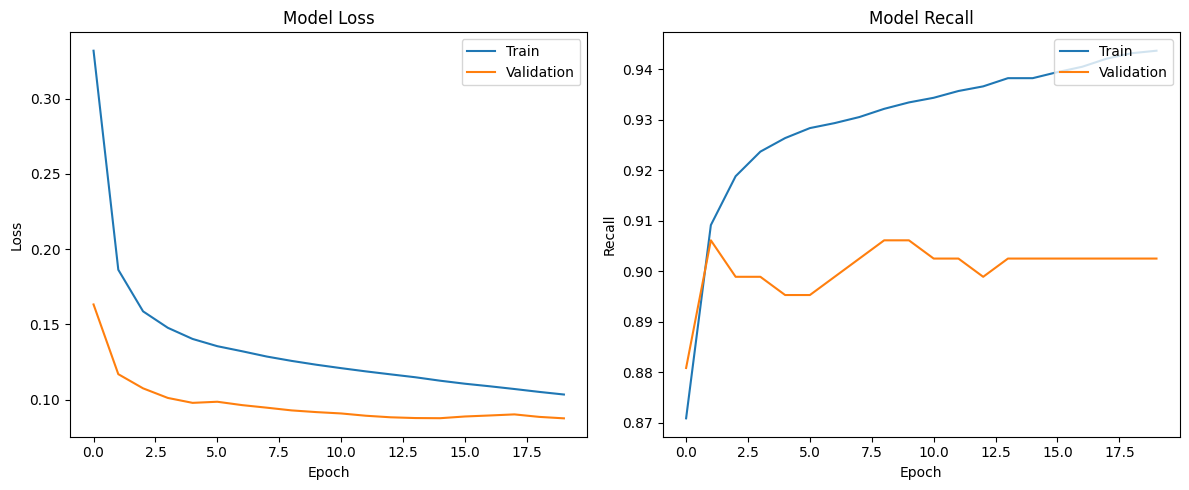

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[16] = [3, [12, 12, 6], ['relu', 'tanh', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', '-', '-', round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   
14                2                 [12, 24]   
15                2                 [12, 12]   
16                3              [12, 12, 6]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   
14                       [relu, tanh]        20          64         0.111105   
15                       [relu, tanh]        20          64         0.086846   
16                 [relu, tanh, relu]        20          64         0.087662   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   
13               0.9796              0.770898           0.898917         -   
14               0.9786              0.756024           0.906137         -   
15               0.9812              0.794212           0.891697      adam   
16               0.9832              0.814332           0.902527      adam   

   class weights dropout  time (secs)  
0              -       -         2.14  
1              -       -       380.32  
2              -       -        24.12  
3              -       -        12.19  
4              -       -        25.48  
5              -       -        23.08  
6            

- The model has performed better than model_15:
 - the recall has increased from 89.17% to 90.25%
 - the precision has increased from 79.42% to 81.43%.
- We will now try tanh activation in the third hidden layer.

### Model 17

Use relu tanh activation instead of relu in the third hidden layer.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_17 = Sequential()
model_17.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_17.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_17.add(Dense(6,activation='tanh', kernel_initializer=HeNormal(seed=812)))
model_17.add(Dense(1, activation = 'sigmoid'))

model_17.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_17.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8106 - loss: 0.4298 - precision: 0.8389 - recall: 0.7752 - val_accuracy: 0.9600 - val_loss: 0.1537 - val_precision: 0.5914 - val_recall: 0.8989
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.2074 - precision: 0.9638 - recall: 0.9049 - val_accuracy: 0.9756 - val_loss: 0.1160 - val_precision: 0.7221 - val_recall: 0.9097
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9460 - loss: 0.1691 - precision: 0.9784 - recall: 0.9137 - val_accuracy: 0.9804 - val_loss: 0.1050 - val_precision: 0.7771 - val_recall: 0.9061
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9514 - loss: 0.1512 - precision: 0.9819 - recall: 0.9211 - val_accuracy: 0.9820 - val_loss: 0.0988 - val_precision: 0.7968 - val_recall: 0.9061
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - loss: 0.1413 - precision: 0.9846 - recall: 0.9259 - val_accuracy: 0.9822 - val_loss: 0.

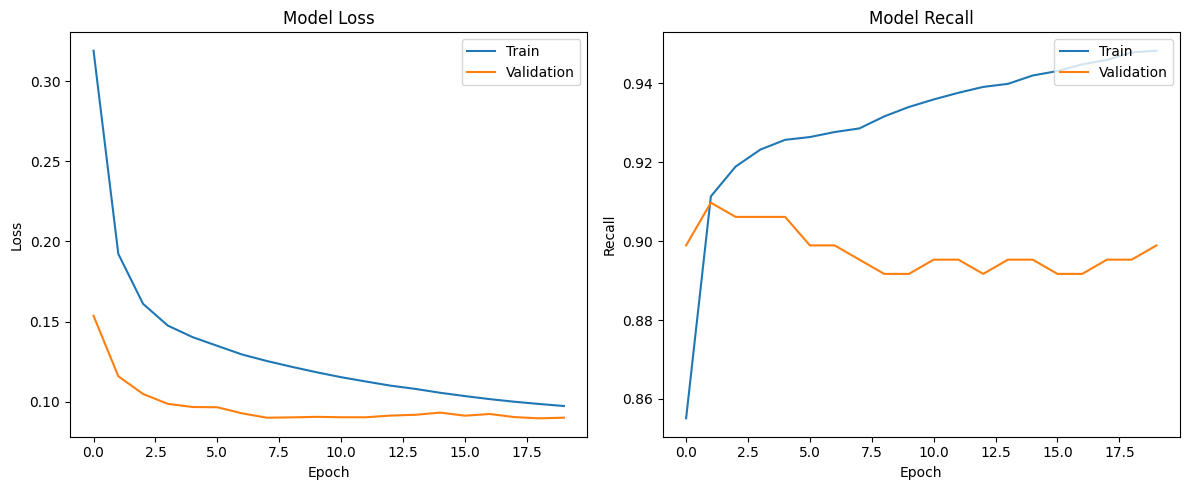

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[17] = [3, [12, 12, 6], ['relu', 'tanh', 'tanh'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', '-', '-', round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   
14                2                 [12, 24]   
15                2                 [12, 12]   
16                3              [12, 12, 6]   
17                3              [12, 12, 6]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   
14                       [relu, tanh]        20          64         0.111105   
15                       [relu, tanh]        20          64         0.086846   
16                 [relu, tanh, relu]        20          64         0.087662   
17                 [relu, tanh, tanh]        20          64         0.090211   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   
13               0.9796              0.770898           0.898917         -   
14               0.9786              0.756024           0.906137         -   
15               0.9812              0.794212           0.891697      adam   
16               0.9832              0.814332           0.902527      adam   
17               0.9784              0.756839           0.898917      adam   

   class weights dropout  time (secs)  
0              -       -         2.14  
1      

- The model has performed hasn't performed any better than model_16:
 - the recall has increased from 90.25% to 90.61%
 - the precision has decreased from 81.43% to 75.68%.
- We will use more neurons in the model_16

### Model 18

Use 12 neurons in the third hidden layer in Model 16.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_18 = Sequential()
model_18.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_18.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_18.add(Dense(12,activation='relu', kernel_initializer=HeNormal(seed=812)))
model_18.add(Dense(1, activation = 'sigmoid'))

model_18.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_18.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8193 - loss: 0.4010 - precision: 0.8220 - recall: 0.8231 - val_accuracy: 0.9582 - val_loss: 0.1613 - val_precision: 0.5802 - val_recall: 0.8881
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9336 - loss: 0.1997 - precision: 0.9643 - recall: 0.9023 - val_accuracy: 0.9788 - val_loss: 0.1078 - val_precision: 0.7599 - val_recall: 0.9025
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9499 - loss: 0.1617 - precision: 0.9809 - recall: 0.9191 - val_accuracy: 0.9830 - val_loss: 0.0911 - val_precision: 0.8137 - val_recall: 0.8989
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1478 - precision: 0.9847 - recall: 0.9219 - val_accuracy: 0.9830 - val_loss: 0.0903 - val_precision: 0.8158 - val_recall: 0.8953
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9557 - loss: 0.1400 - precision: 0.9867 - recall: 0.9249 - val_accuracy: 0.9848 - val_loss: 0.

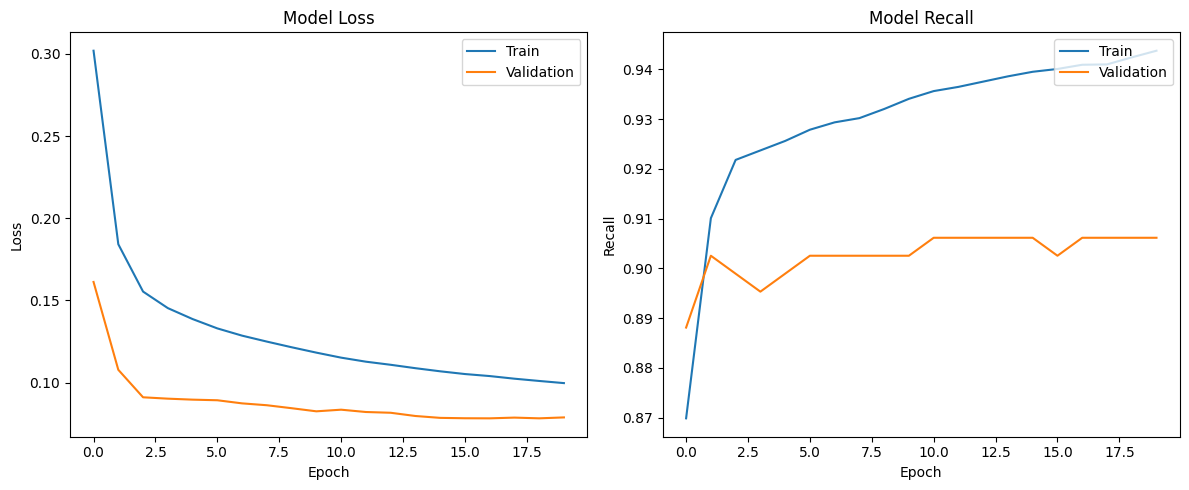

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[18] = [3, [12, 12, 12], ['relu', 'tanh', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', '-', '-', round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   
14                2                 [12, 24]   
15                2                 [12, 12]   
16                3              [12, 12, 6]   
17                3              [12, 12, 6]   
18                3             [12, 12, 12]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   
14                       [relu, tanh]        20          64         0.111105   
15                       [relu, tanh]        20          64         0.086846   
16                 [relu, tanh, relu]        20          64         0.087662   
17                 [relu, tanh, tanh]        20          64         0.090211   
18                 [relu, tanh, relu]        20          64         0.078884   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   
13               0.9796              0.770898           0.898917         -   
14               0.9786              0.756024           0.906137         -   
15               0.9812              0.794212           0.891697      adam   
16               0.9832              0.814332           0.902527      adam   
17               0.9784              0

- The model hasn performed a little better than model 16.
 - The recall has increased from 90.25% to 90.61%, the precision has decreased from 81.43% to 80.45% and the loss has also increased.
 - The loss has reduced from 0.0876 to 0.0788.
- We will now try using class weights in model_18 as the accuracy is high but the recall is not as good.

### Model 19

Using class_weights with Model 18.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
class_weights = {0: 1.0, 1: 3.0}

model_19 = Sequential()
model_19.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_19.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_19.add(Dense(12,activation='relu', kernel_initializer=HeNormal(seed=812)))
model_19.add(Dense(1, activation = 'sigmoid'))

model_19.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_19.fit(X_train, y_train, class_weight=class_weights,epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7371 - loss: 0.8260 - precision: 0.6935 - recall: 0.8743 - val_accuracy: 0.9076 - val_loss: 0.3187 - val_precision: 0.3650 - val_recall: 0.9025
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9153 - loss: 0.3910 - precision: 0.9094 - recall: 0.9251 - val_accuracy: 0.9514 - val_loss: 0.2315 - val_precision: 0.5360 - val_recall: 0.9134
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.3134 - precision: 0.9455 - recall: 0.9322 - val_accuracy: 0.9612 - val_loss: 0.2149 - val_precision: 0.5981 - val_recall: 0.9134
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.2813 - precision: 0.9531 - recall: 0.9387 - val_accuracy: 0.9656 - val_loss: 0.1958 - val_precision: 0.6303 - val_recall: 0.9170
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9485 - loss: 0.2600 - precision: 0.9547 - recall: 0.9432 - val_accuracy: 0.9574 - val_loss: 0.

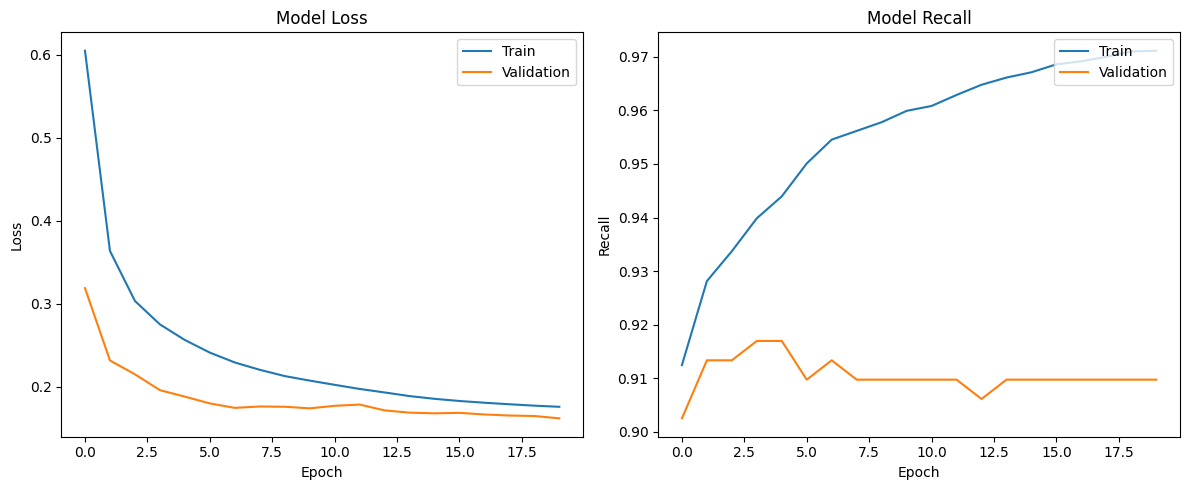

In [ ]:
plot(history, 'loss', 'recall')

- The model is clearly overfitting. The Train recall is above 97% but the validation recall is 91%.
- We will use otheer regularization methods to counter this issue.

In [ ]:
results.loc[19] = [3, [12, 12, 12], ['relu', 'tanh', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', '-', {0: 1.0, 1: 3.0}, round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   
14                2                 [12, 24]   
15                2                 [12, 12]   
16                3              [12, 12, 6]   
17                3              [12, 12, 6]   
18                3             [12, 12, 12]   
19                3             [12, 12, 12]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   
14                       [relu, tanh]        20          64         0.111105   
15                       [relu, tanh]        20          64         0.086846   
16                 [relu, tanh, relu]        20          64         0.087662   
17                 [relu, tanh, tanh]        20          64         0.090211   
18                 [relu, tanh, relu]        20          64         0.078884   
19                 [relu, tanh, relu]        20          64         0.161800   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   
13               0.9796              0.770898           0.898917         -   
14               0.9786              0.756024           0.906137         -   
15               0.9812              0.794212           0.891697  

- The model hasn't performed better than model 18:
 - The recall has increased from 90.6% to 90.98%
 -  the precision has decreased from 80.45% to 50.91%
 -  the model loss has also increased sgnificantly.
- We will now try using dropouts in the above model to overcome overfitting.

### Model 20

Using dropouts in the hidden layers.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
class_weights = {0: 1.0, 1: 3.0}

model_20 = Sequential()
model_20.add(Dense(12, activation='relu', input_dim=X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_20.add(Dropout(0.2))  # Add dropout after the first dense layer
model_20.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_20.add(Dropout(0.2))  # Add dropout after the second dense layer
model_20.add(Dense(12, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_20.add(Dropout(0.2)) # Add dropout after the third dense layer
model_20.add(Dense(1, activation='sigmoid'))

model_20.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_20.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), class_weight=class_weights)
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5613 - loss: 1.3409 - precision: 0.5469 - recall: 0.7287 - val_accuracy: 0.8154 - val_loss: 0.5465 - val_precision: 0.2201 - val_recall: 0.9170
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8222 - loss: 0.6330 - precision: 0.7748 - recall: 0.9155 - val_accuracy: 0.8730 - val_loss: 0.4204 - val_precision: 0.2923 - val_recall: 0.9097
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.5362 - precision: 0.8261 - recall: 0.9178 - val_accuracy: 0.9156 - val_loss: 0.3552 - val_precision: 0.3883 - val_recall: 0.9097
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8862 - loss: 0.4844 - precision: 0.8660 - recall: 0.9174 - val_accuracy: 0.9410 - val_loss: 0.3303 - val_precision: 0.4828 - val_recall: 0.9097
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9048 - loss: 0.4412 - precision: 0.9004 - recall: 0.9129 - val_accuracy: 0.9662 - val_loss: 0.

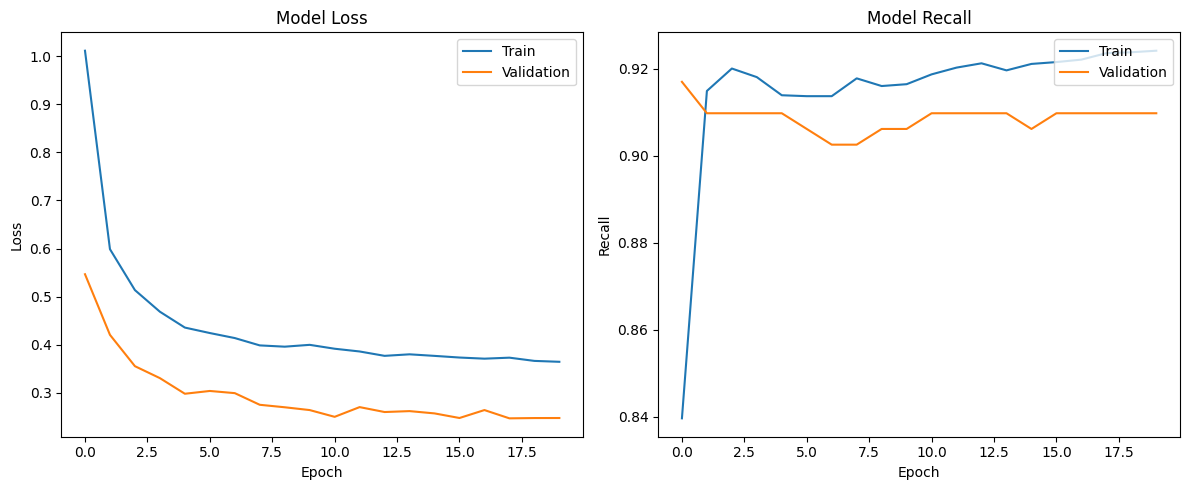

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[20] = [3, [12, 12, 12], ['relu', 'tanh', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', [0.2, 0.2, 0.2], {0: 1.0, 1: 3.0}, round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   
14                2                 [12, 24]   
15                2                 [12, 12]   
16                3              [12, 12, 6]   
17                3              [12, 12, 6]   
18                3             [12, 12, 12]   
19                3             [12, 12, 12]   
20                3             [12, 12, 12]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   
14                       [relu, tanh]        20          64         0.111105   
15                       [relu, tanh]        20          64         0.086846   
16                 [relu, tanh, relu]        20          64         0.087662   
17                 [relu, tanh, tanh]        20          64         0.090211   
18                 [relu, tanh, relu]        20          64         0.078884   
19                 [relu, tanh, relu]        20          64         0.161800   
20                 [relu, tanh, relu]        20          64         0.247326   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.776398           0.902527         -   
13               0.9796              0.770898           0.898917         -   
14              

- Adding dropouts has improved the performance of the model:
 - The recall is the same: 90.98%
 - precision has increasaed significantly to 60.72%%
 - the loss has also increased from 0.162 to 0.247.
- We will add more hidden layers and increase the class weights.

### Model 21

Add one more hidden layer with 6 neurons and relu activation and increase the class weights.

In [28]:
tf.keras.backend.clear_session()

In [ ]:
class_weights = {0: 1.0, 1: 5.0}

model_21 = Sequential()
model_21.add(Dense(12, activation='relu', input_dim=X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_21.add(Dropout(0.2, seed=812))
model_21.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_21.add(Dropout(0.2))
model_21.add(Dense(12, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_21.add(Dropout(0.2, seed=812))
model_21.add(Dense(6, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_21.add(Dropout(0.2, seed=812))
model_21.add(Dense(1, activation='sigmoid'))

model_21.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_21.fit(X_train, y_train, class_weight=class_weights,epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4932 - loss: 2.1725 - precision: 0.4924 - recall: 0.6488 - val_accuracy: 0.4786 - val_loss: 0.9678 - val_precision: 0.0918 - val_recall: 0.9458
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6237 - loss: 1.0057 - precision: 0.5780 - recall: 0.9566 - val_accuracy: 0.8012 - val_loss: 0.6636 - val_precision: 0.2083 - val_recall: 0.9242
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7741 - loss: 0.8081 - precision: 0.7110 - recall: 0.9335 - val_accuracy: 0.8430 - val_loss: 0.5876 - val_precision: 0.2500 - val_recall: 0.9170
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8118 - loss: 0.7159 - precision: 0.7540 - recall: 0.9326 - val_accuracy: 0.8656 - val_loss: 0.5414 - val_precision: 0.2808 - val_recall: 0.9134
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.6647 - precision: 0.7739 - recall: 0.9366 - val_accuracy: 0.8786 - val_loss: 0.

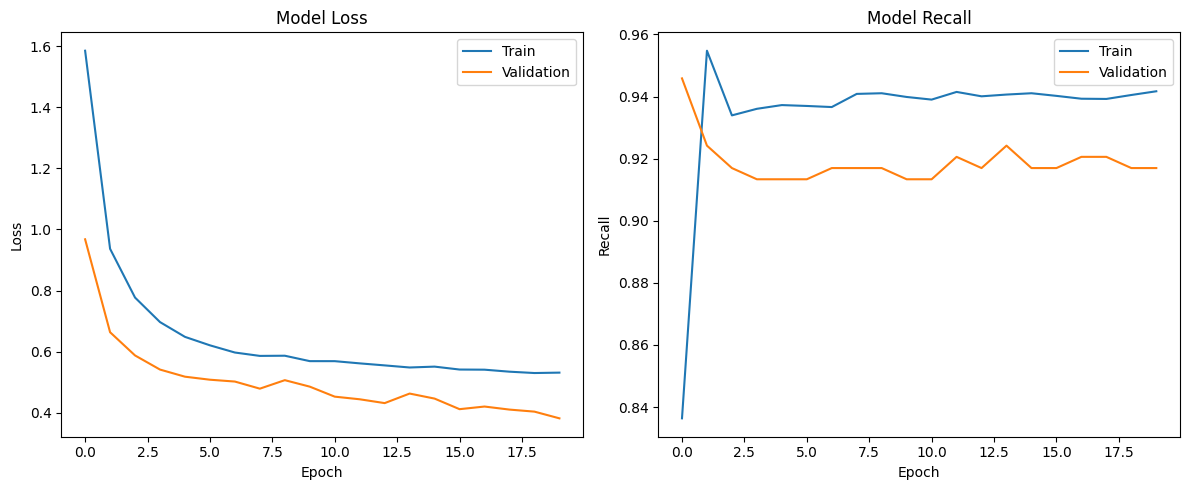

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[21] = [4, [12, 12, 12, 6], ['relu', 'tanh', 'relu', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', [0.2, 0.2, 0.2, 0.2], {0: 1.0, 1: 5.0}, round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 0                        -   
1                 0                        -   
2                 0                        -   
3                 0                        -   
4                 0                        -   
5                 1                        6   
6                 1                       12   
7                 1                       24   
8                 1                       12   
9                 1                       12   
10                2                  [12, 6]   
11                2                  [12, 6]   
12                2                  [12, 6]   
13                2                 [12, 12]   
14                2                 [12, 24]   
15                2                 [12, 12]   
16                3              [12, 12, 6]   
17                3              [12, 12, 6]   
18                3             [12, 12, 12]   
19                3             [12, 12, 12]   
20                3             [12, 12, 12]   
21                4          [12, 12, 12, 6]   

   activation function - hidden layer  # epochs  batch size  validation loss  \
0                                   -        10       28334         1.165204   
1                                   -        10           1         0.300628   
2                                   -        10          32         0.301953   
3                                   -        10          64         0.299334   
4                                   -        25          64         0.303334   
5                             sigmoid        20          64         0.223517   
6                             sigmoid        20          64         0.207986   
7                             sigmoid        20          64         0.195188   
8                                relu        20          64         0.121263   
9                                tanh        20          64         0.185709   
10                    [relu, sigmoid]        20          64         0.135812   
11                       [relu, relu]        20          64         0.109501   
12                       [relu, tanh]        20          64         0.108745   
13                       [relu, tanh]        20          64         0.110163   
14                       [relu, tanh]        20          64         0.111105   
15                       [relu, tanh]        20          64         0.086846   
16                 [relu, tanh, relu]        20          64         0.087662   
17                 [relu, tanh, tanh]        20          64         0.090211   
18                 [relu, tanh, relu]        20          64         0.078884   
19                 [relu, tanh, relu]        20          64         0.161800   
20                 [relu, tanh, relu]        20          64         0.247326   
21           [relu, tanh, relu, relu]        20          64         0.381729   

    validation accuracy  validation precision  validation recall optimizer  \
0                0.6950              0.078378           0.418773         -   
1                0.8836              0.289073           0.754513         -   
2                0.8762              0.291971           0.866426         -   
3                0.8796              0.299630           0.877256         -   
4                0.8776              0.295482           0.873646         -   
5                0.9262              0.422297           0.902527         -   
6                0.9330              0.448214           0.906137         -   
7                0.9432              0.493151           0.909747         -   
8                0.9768              0.738872           0.898917         -   
9                0.9450              0.501992           0.909747         -   
10               0.9760              0.726225           0.909747         -   
11               0.9816              0.793651           0.902527         -   
12               0.9802              0.77639

- After using an extra hidden layer in our model:
 - recall has increased a little to 91.7%
-  precision has increased to 55.95%. This is still not much better than model 16 or model 18.
- We'll just randomly try another neural network with more hidden layers.

### Model 22

Use 10 hidden layers with relu and tanh activations alternatively and increase the epochs.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
class_weights = {0: 1.0, 1: 5.0}

model_22 = Sequential()
model_22.add(Dense(12, activation='relu', input_dim=X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_22.add(Dropout(0.2, seed=812))
model_22.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_22.add(Dropout(0.2, seed=812))
model_22.add(Dense(12, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_22.add(Dropout(0.2, seed=812))
model_22.add(Dense(6, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_22.add(Dropout(0.1, seed=812))
model_22.add(Dense(12, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_22.add(Dropout(0.15, seed=812))
model_22.add(Dense(6, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_22.add(Dropout(0.1, seed=812))
model_22.add(Dense(12, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_22.add(Dropout(0.15, seed=812))
model_22.add(Dense(6, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_22.add(Dropout(0.1, seed=812))
model_22.add(Dense(12, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_22.add(Dropout(0.15, seed=812))
model_22.add(Dense(6, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_22.add(Dropout(0.1, seed=812))
model_22.add(Dense(1, activation='sigmoid'))

model_22.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_22.fit(X_train, y_train, class_weight=class_weights,epochs=100, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5377 - loss: 1.5756 - precision: 0.5280 - recall: 0.8402 - val_accuracy: 0.8374 - val_loss: 0.7988 - val_precision: 0.2428 - val_recall: 0.9134
Epoch 2/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7446 - loss: 0.8965 - precision: 0.6812 - recall: 0.9324 - val_accuracy: 0.8872 - val_loss: 0.6843 - val_precision: 0.3190 - val_recall: 0.9134
Epoch 3/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7988 - loss: 0.7836 - precision: 0.7395 - recall: 0.9306 - val_accuracy: 0.8830 - val_loss: 0.6312 - val_precision: 0.3108 - val_recall: 0.9134
Epoch 4/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8253 - loss: 0.7226 - precision: 0.7715 - recall: 0.9307 - val_accuracy: 0.9002 - val_loss: 0.5880 - val_precision: 0.3475 - val_recall: 0.9134
Epoch 5/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8381 - loss: 0.6926 - precision: 0.7892 - recall: 0.9285 - val_accuracy: 0.9112 - val_los

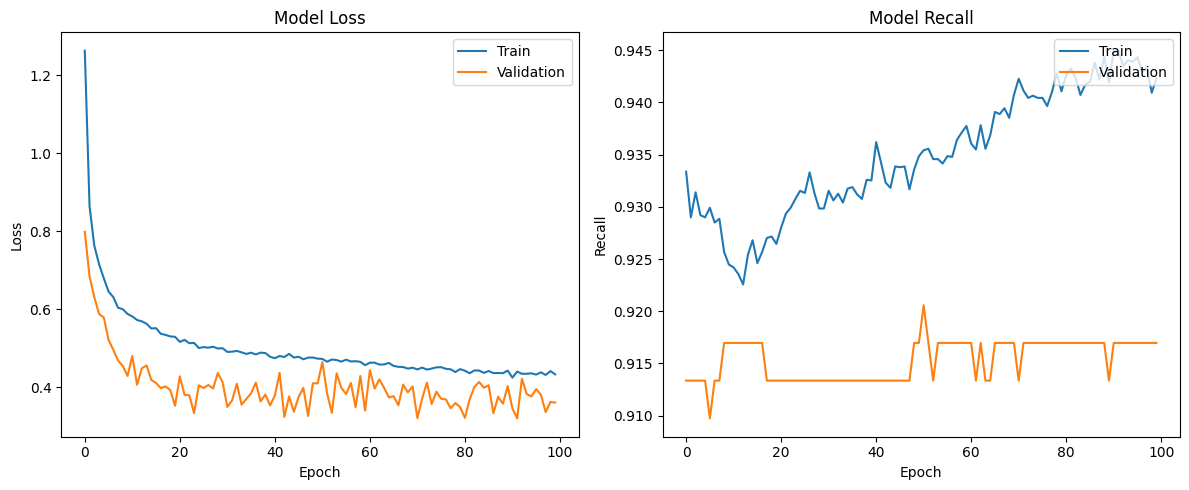

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[22] = [10, [12, 12, 12, 6, 12, 6, 12, 6, 12, 6], ['relu', 'tanh', 'relu', 'tanh', 'relu', 'tanh', 'relu', 'tanh', 'relu', 'tanh'], 50, 64, history.history["val_loss"][-1],
                   history.history["val_accuracy"][-1], history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam',
                    [0.2, 0.2, 0.2, 0.1, 0.15, 0.15, 0.1, 0.15, 0.1, 0.15], {0: 1.0, 1: 5.0}, round(end-start,2)]

results

# hidden layers              # neurons - hidden layer  \
0                 0                                     -   
1                 0                                     -   
2                 0                                     -   
3                 0                                     -   
4                 0                                     -   
5                 1                                     6   
6                 1                                    12   
7                 1                                    24   
8                 1                                    12   
9                 1                                    12   
10                2                               [12, 6]   
11                2                               [12, 6]   
12                2                               [12, 6]   
13                2                              [12, 12]   
14                2                              [12, 24]   
15                2                              [12, 12]   
16                3                           [12, 12, 6]   
17                3                           [12, 12, 6]   
18                3                          [12, 12, 12]   
19                3                          [12, 12, 12]   
20                3                          [12, 12, 12]   
21                4                       [12, 12, 12, 6]   
22               10  [12, 12, 12, 6, 12, 6, 12, 6, 12, 6]   

                   activation function - hidden layer  # epochs  batch size  \
0                                                   -        10       28334   
1                                                   -        10           1   
2                                                   -        10          32   
3                                                   -        10          64   
4                                                   -        25          64   
5                                             sigmoid        20          64   
6                                             sigmoid        20          64   
7                                             sigmoid        20          64   
8                                                relu        20          64   
9                                                tanh        20          64   
10                                    [relu, sigmoid]        20          64   
11                                       [relu, relu]        20          64   
12                                       [relu, tanh]        20          64   
13                                       [relu, tanh]        20          64   
14                                       [relu, tanh]        20          64   
15                                       [relu, tanh]        20          64   
16                                 [relu, tanh, relu]        20          64   
17                                 [relu, tanh, tanh]        20          64   
18                                 [relu, tanh, relu]        20          64   
19                                 [relu, tanh, relu]        20          64   
20                                 [relu, tanh, relu]        20          64   
21                           [relu, tanh, relu, relu]        20          64   
22  [relu, tanh, relu, tanh, relu, tanh, relu, tan...        50          64   

    validation loss  validation accuracy  validation precision  \
0          1.165204               0.6950              0.078378   
1          0.300628               0.8836              0.289073   
2          0.301953               0.8762              0.291971   
3          0.299334               0.8796              0.299630   
4          0.303334               0.8776              0.295482   
5          0.223517               0.9262              0.422297   
6          0.207986               0.9330              0.448214   
7          0.195188               0.9432              0.493151   
8          0.121263               0.9768        

- The above model, inspite of being complex, hasn't improved.
 - The recall is 91.7% which is the same as model 21.
 - The precision is 46.95% which is less than many other models.
 - The model loss is also more: 0.361.
- Now, we will use dropouts for Model 18 which is the best model till now.

### Model 23

Add dropouts to Model 18.

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_23 = Sequential()
model_23.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_23.add(Dropout(0.2))
model_23.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_23.add(Dropout(0.2))
model_23.add(Dense(12,activation='relu', kernel_initializer=HeNormal(seed=812)))
model_23.add(Dropout(0.2))
model_23.add(Dense(1, activation = 'sigmoid'))

model_23.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_23.fit(X_train, y_train, class_weight=class_weights, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6264 - loss: 1.7893 - precision: 0.6120 - recall: 0.7070 - val_accuracy: 0.7676 - val_loss: 0.7071 - val_precision: 0.1828 - val_recall: 0.9206
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7984 - loss: 0.7995 - precision: 0.7373 - recall: 0.9353 - val_accuracy: 0.8338 - val_loss: 0.5989 - val_precision: 0.2397 - val_recall: 0.9206
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.6844 - precision: 0.7863 - recall: 0.9341 - val_accuracy: 0.8732 - val_loss: 0.5018 - val_precision: 0.2932 - val_recall: 0.9134
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8576 - loss: 0.6237 - precision: 0.8141 - recall: 0.9316 - val_accuracy: 0.8750 - val_loss: 0.4708 - val_precision: 0.2967 - val_recall: 0.9170
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.5696 - precision: 0.8398 - recall: 0.9344 - val_accuracy: 0.8858 - val_loss: 0.

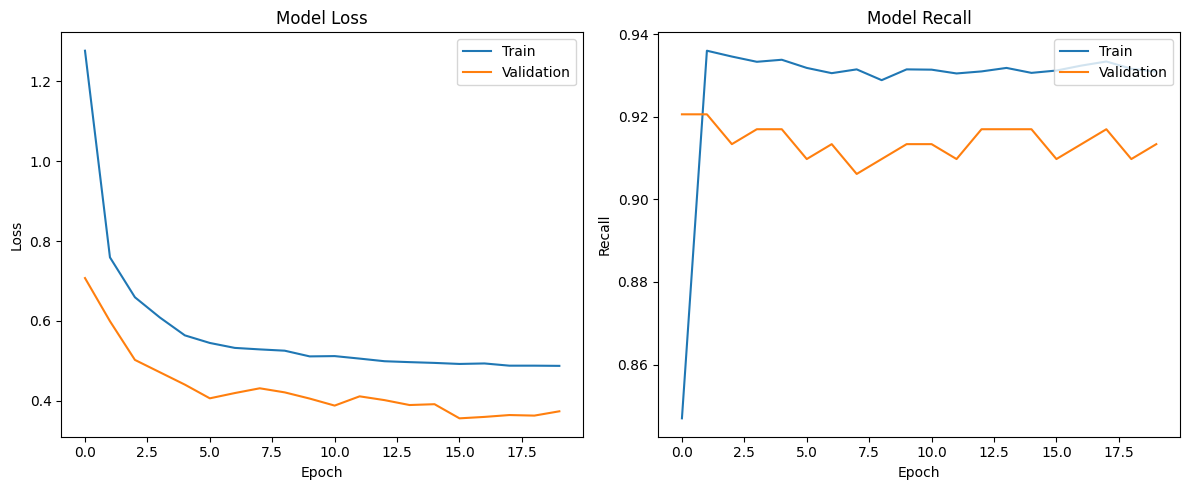

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.loc[23] = [3, [12, 12, 12], ['relu', 'tanh', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', [0.2, 0.2, 0.2], '-', round(end-start,2)]

results

# hidden layers              # neurons - hidden layer  \
0                 0                                     -   
1                 0                                     -   
2                 0                                     -   
3                 0                                     -   
4                 0                                     -   
5                 1                                     6   
6                 1                                    12   
7                 1                                    24   
8                 1                                    12   
9                 1                                    12   
10                2                               [12, 6]   
11                2                               [12, 6]   
12                2                               [12, 6]   
13                2                              [12, 12]   
14                2                              [12, 24]   
15                2                              [12, 12]   
16                3                           [12, 12, 6]   
17                3                           [12, 12, 6]   
18                3                          [12, 12, 12]   
19                3                          [12, 12, 12]   
20                3                          [12, 12, 12]   
21                4                       [12, 12, 12, 6]   
22               10  [12, 12, 12, 6, 12, 6, 12, 6, 12, 6]   
23                3                          [12, 12, 12]   

                   activation function - hidden layer  # epochs  batch size  \
0                                                   -        10       28334   
1                                                   -        10           1   
2                                                   -        10          32   
3                                                   -        10          64   
4                                                   -        25          64   
5                                             sigmoid        20          64   
6                                             sigmoid        20          64   
7                                             sigmoid        20          64   
8                                                relu        20          64   
9                                                tanh        20          64   
10                                    [relu, sigmoid]        20          64   
11                                       [relu, relu]        20          64   
12                                       [relu, tanh]        20          64   
13                                       [relu, tanh]        20          64   
14                                       [relu, tanh]        20          64   
15                                       [relu, tanh]        20          64   
16                                 [relu, tanh, relu]        20          64   
17                                 [relu, tanh, tanh]        20          64   
18                                 [relu, tanh, relu]        20          64   
19                                 [relu, tanh, relu]        20          64   
20                                 [relu, tanh, relu]        20          64   
21                           [relu, tanh, relu, relu]        20          64   
22  [relu, tanh, relu, tanh, relu, tanh, relu, tan...        50          64   
23                                 [relu, tanh, relu]        20          64   

    validation loss  validation accuracy  validation precision  \
0          1.165204               0.6950              0.078378   
1          0.300628               0.8836              0.289073   
2          0.301953               0.8762              0.291971   
3          0.299334               0.8796              0.299630   
4          0.303334               0.8776              0.295482   
5          0.223517               0.9262              0.422297   
6          0.207986               0.9330

- Using dropouts on Model 18 hasn't significantly increased the model's performance:
 - The recall has increased from 90.61% to 91.34%.
 - The precision has decreased from 80.45% to 44.08%.
 - The training and validation recall are close and the model is not overfitting. This is the only significant improvement.
 - The model loss has aslo increased from 0.079 to 0.373
- We will now use different class weights in model 18

### Model 24

Set class weight: {0: 1.0, 1: 2.0} for model 18

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
class_weights = {0: 1.0, 1: 10.0}

model_24 = Sequential()
model_24.add(Dense(12,activation='relu',input_dim = X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_24.add(Dense(12, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_24.add(Dense(12,activation='relu', kernel_initializer=HeNormal(seed=812)))
model_24.add(Dense(1, activation = 'sigmoid'))

model_24.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'precision', 'recall'])

In [ ]:
start = time.time()
history = model_24.fit(X_train, y_train, class_weight=class_weights, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5238 - loss: 4.0693 - precision: 0.5048 - recall: 0.6283 - val_accuracy: 0.5264 - val_loss: 0.9919 - val_precision: 0.0996 - val_recall: 0.9386
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7299 - loss: 0.9327 - precision: 0.6597 - recall: 0.9643 - val_accuracy: 0.6024 - val_loss: 0.8164 - val_precision: 0.1162 - val_recall: 0.9350
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7606 - loss: 0.7753 - precision: 0.6866 - recall: 0.9708 - val_accuracy: 0.6980 - val_loss: 0.6898 - val_precision: 0.1471 - val_recall: 0.9278
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8188 - loss: 0.6558 - precision: 0.7463 - recall: 0.9732 - val_accuracy: 0.7556 - val_loss: 0.5789 - val_precision: 0.1766 - val_recall: 0.9314
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.5800 - precision: 0.7785 - recall: 0.9767 - val_accuracy: 0.7734 - val_loss: 0.

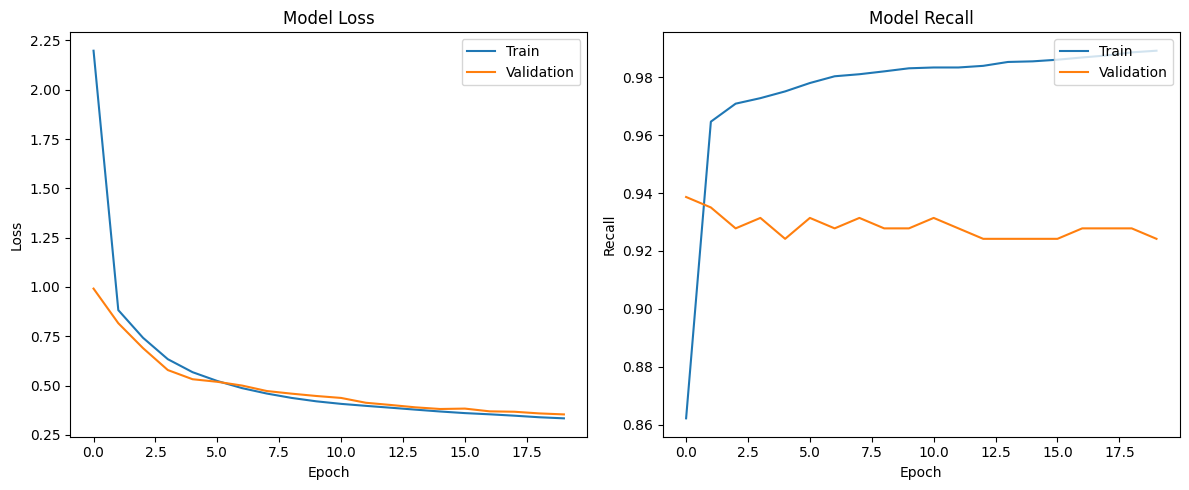

In [ ]:
plot(history, 'loss', 'recall')

In [ ]:
results.drop(index=24, inplace=True)
results.loc[24] = [3, [12, 12, 12], ['relu', 'tanh', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', '-', {0: 1.0, 1: 10.0} , round(end-start,2)]

results

# hidden layers              # neurons - hidden layer  \
0                 0                                     -   
1                 0                                     -   
2                 0                                     -   
3                 0                                     -   
4                 0                                     -   
5                 1                                     6   
6                 1                                    12   
7                 1                                    24   
8                 1                                    12   
9                 1                                    12   
10                2                               [12, 6]   
11                2                               [12, 6]   
12                2                               [12, 6]   
13                2                              [12, 12]   
14                2                              [12, 24]   
15                2                              [12, 12]   
16                3                           [12, 12, 6]   
17                3                           [12, 12, 6]   
18                3                          [12, 12, 12]   
19                3                          [12, 12, 12]   
20                3                          [12, 12, 12]   
21                4                       [12, 12, 12, 6]   
22               10  [12, 12, 12, 6, 12, 6, 12, 6, 12, 6]   
23                3                          [12, 12, 12]   
24                3                          [12, 12, 12]   

                   activation function - hidden layer  # epochs  batch size  \
0                                                   -        10       28334   
1                                                   -        10           1   
2                                                   -        10          32   
3                                                   -        10          64   
4                                                   -        25          64   
5                                             sigmoid        20          64   
6                                             sigmoid        20          64   
7                                             sigmoid        20          64   
8                                                relu        20          64   
9                                                tanh        20          64   
10                                    [relu, sigmoid]        20          64   
11                                       [relu, relu]        20          64   
12                                       [relu, tanh]        20          64   
13                                       [relu, tanh]        20          64   
14                                       [relu, tanh]        20          64   
15                                       [relu, tanh]        20          64   
16                                 [relu, tanh, relu]        20          64   
17                                 [relu, tanh, tanh]        20          64   
18                                 [relu, tanh, relu]        20          64   
19                                 [relu, tanh, relu]        20          64   
20                                 [relu, tanh, relu]        20          64   
21                           [relu, tanh, relu, relu]        20          64   
22  [relu, tanh, relu, tanh, relu, tanh, relu, tan...        50          64   
23                                 [relu, tanh, relu]        20          64   
24                                 [relu, tanh, relu]        20          64   

    validation loss  validation accuracy  validation precision  \
0          1.165204               0.6950              0.078378   
1          0.300628               0.8836              0.289073   
2          0.301953               0.8762              0.291971   
3          0.299334               0.8796              0.299630   
4          0.303334             

- Using class weights on model 18 hasn't improved our model:
 - The recall has increased to 92.42%
 - Loss has increased and precision has decreased to 24.43%.
- Using class weights is not good for the model as it increases the recall by a small amount by the precision gets decreased by a large amount.
- We will use model 18 and try more neurons.

### Model 25

Use Batch Normalization on model 18 and use more neurons.

In [278]:
tf.keras.backend.clear_session()

In [279]:
model_25 = Sequential()

# Input Layer + First Hidden Layer with Batch Normalization
model_25.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_25.add(BatchNormalization())  # Normalizing activations
model_25.add(Dropout(0.15))

# Second Hidden Layer
model_25.add(Dense(16, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_25.add(BatchNormalization())  # Normalizing activations
model_25.add(Dropout(0.15))

# Third Hidden Layer
model_25.add(Dense(8, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_25.add(BatchNormalization())  # Normalizing activations
model_25.add(Dropout(0.1))

# Output Layer (Binary Classification)
model_25.add(Dense(1, activation='sigmoid'))

# Compile the Model
model_25.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy', 'precision', 'recall']
)

# Summary of the Model
model_25.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,209 (8.63 KB)

 Trainable params: 2,097 (8.19 KB)

 Non-trainable params: 112 (448.00 B)

In [280]:
start = time.time()
history = model_25.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7971 - loss: 0.4413 - precision: 0.8043 - recall: 0.7939 - val_accuracy: 0.9716 - val_loss: 0.1294 - val_precision: 0.6839 - val_recall: 0.9061
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9142 - loss: 0.2403 - precision: 0.9413 - recall: 0.8858 - val_accuracy: 0.9818 - val_loss: 0.1089 - val_precision: 0.7962 - val_recall: 0.9025
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9288 - loss: 0.2164 - precision: 0.9565 - recall: 0.9004 - val_accuracy: 0.9870 - val_loss: 0.0930 - val_precision: 0.8605 - val_recall: 0.9134
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9312 - loss: 0.2079 - precision: 0.9583 - recall: 0.9035 - val_accuracy: 0.9876 - val_loss: 0.0950 - val_precision: 0.8694 - val_recall: 0.9134
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9351 - loss: 0.1958 - precision: 0.9628 - recall: 0.9069 - val_accuracy: 0.9898 - val_loss: 0.

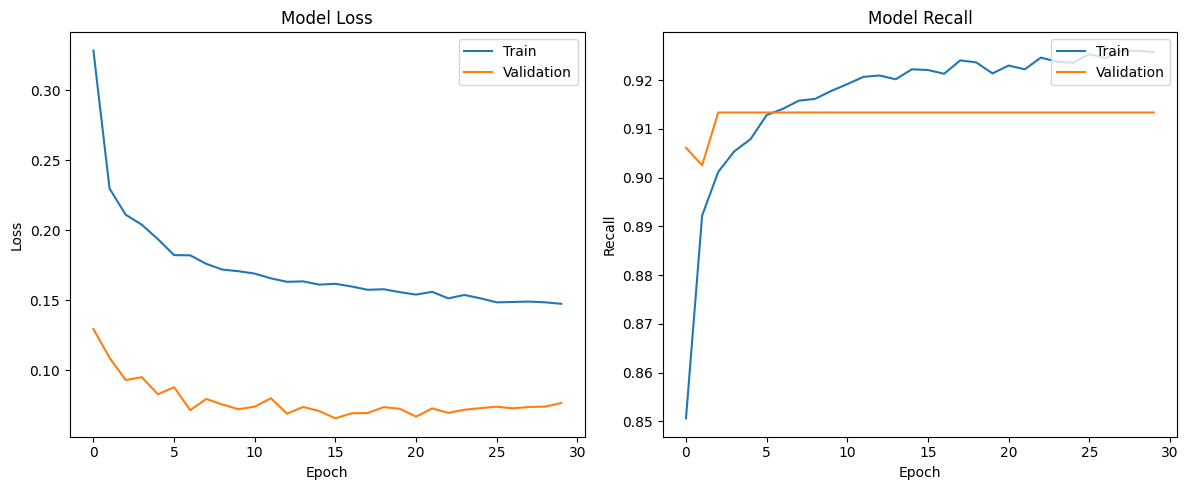

In [281]:
plot(history, 'loss', 'recall')

In [282]:
results.drop(index=25, inplace=True)
results.loc[25] = [[3, 'batch normalized'], [32, 16, 8], ['relu', 'tanh', 'relu'], 30, 32, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', [0.15, 0.15, 0.1], '-', round(end-start,2)]

results

# hidden layers              # neurons - hidden layer  \
0                       0                                     -   
1                       0                                     -   
2                       0                                     -   
3                       0                                     -   
4                       0                                     -   
5                       1                                     6   
6                       1                                    12   
7                       1                                    24   
8                       1                                    12   
9                       1                                    12   
10                      2                               [12, 6]   
11                      2                               [12, 6]   
12                      2                               [12, 6]   
13                      2                              [12, 12]   
14                      2                              [12, 24]   
15                      2                              [12, 12]   
16                      3                           [12, 12, 6]   
17                      3                           [12, 12, 6]   
18                      3                          [12, 12, 12]   
19                      3                          [12, 12, 12]   
20                      3                          [12, 12, 12]   
21                      4                       [12, 12, 12, 6]   
22                     10  [12, 12, 12, 6, 12, 6, 12, 6, 12, 6]   
23                      3                          [12, 12, 12]   
24                      3                          [12, 12, 12]   
25  [3, batch normalized]                           [32, 16, 8]   

                   activation function - hidden layer  # epochs  batch size  \
0                                                   -        10       28334   
1                                                   -        10           1   
2                                                   -        10          32   
3                                                   -        10          64   
4                                                   -        25          64   
5                                             sigmoid        20          64   
6                                             sigmoid        20          64   
7                                             sigmoid        20          64   
8                                                relu        20          64   
9                                                tanh        20          64   
10                                    [relu, sigmoid]        20          64   
11                                       [relu, relu]        20          64   
12                                       [relu, tanh]        20          64   
13                                       [relu, tanh]        20          64   
14                                       [relu, tanh]        20          64   
15                                       [relu, tanh]        20          64   
16                                 [relu, tanh, relu]        20          64   
17                                 [relu, tanh, tanh]        20          64   
18                                 [relu, tanh, relu]        20          64   
19                                 [relu, tanh, relu]        20          64   
20                                 [relu, tanh, relu]        20          64   
21                           [relu, tanh, relu, relu]        20          64   
22  [relu, tanh, relu, tanh, relu, tanh, relu, tan...        50          64   
23                                 [relu, tanh, relu]        20          64   
24                                 [relu, tanh, relu]        20          64   
25                                 [relu, tanh, relu]        30          32   

    validation loss  validation accuracy  validation precision  \


- Using more neurons with batch normalization has significantly improved the peroformance of the model:
 - The recall is 91.34%
 - Precision has increased greatly from 80.5% to 92%.
- We will now try more layers for the above model.

### Model 26

Add more hidden layer and neurons to model 25

In [283]:
tf.keras.backend.clear_session()

In [284]:
model_26 = Sequential()

# Input Layer + First Hidden Layer with Batch Normalization
model_26.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_26.add(BatchNormalization())  # Normalizing activations
model_26.add(Dropout(0.2))

# Second Hidden Layer
model_26.add(Dense(32, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_26.add(BatchNormalization())  # Normalizing activations
model_26.add(Dropout(0.15))

# Third Hidden Layer
model_26.add(Dense(16, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_26.add(BatchNormalization())  # Normalizing activations
model_26.add(Dropout(0.15))

# Fourth Hidden Layer
model_26.add(Dense(8, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_26.add(BatchNormalization())  # Normalizing activations
model_26.add(Dropout(0.1))

# Output Layer (Binary Classification)
model_26.add(Dense(1, activation='sigmoid'))

# Compile the Model
model_26.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy', 'precision', 'recall']
)

In [285]:
start = time.time()
history = model_26.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7940 - loss: 0.4504 - precision: 0.7940 - recall: 0.8026 - val_accuracy: 0.9634 - val_loss: 0.1298 - val_precision: 0.6152 - val_recall: 0.9061
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9173 - loss: 0.2412 - precision: 0.9456 - recall: 0.8880 - val_accuracy: 0.9810 - val_loss: 0.1050 - val_precision: 0.7844 - val_recall: 0.9061
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9356 - loss: 0.2046 - precision: 0.9668 - recall: 0.9039 - val_accuracy: 0.9816 - val_loss: 0.1021 - val_precision: 0.7882 - val_recall: 0.9134
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9404 - loss: 0.1906 - precision: 0.9694 - recall: 0.9110 - val_accuracy: 0.9850 - val_loss: 0.0911 - val_precision: 0.8322 - val_recall: 0.9134
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9436 - loss: 0.1777 - precision: 0.9733 - recall: 0.9139 - val_accuracy: 0.9860 - val_loss: 0.

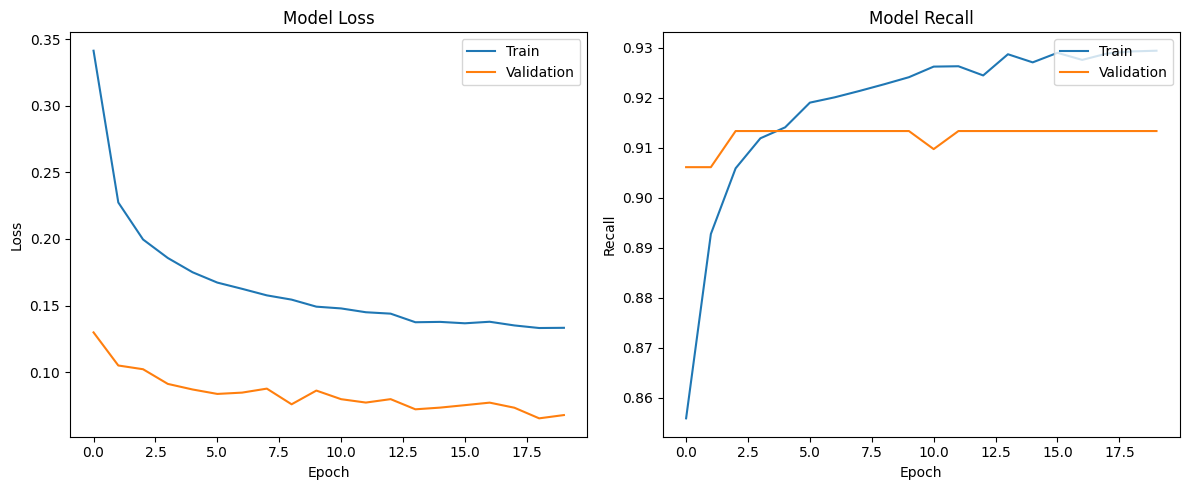

In [286]:
plot(history, 'loss', 'recall')

In [290]:
results.loc[26] = [[4, 'batch normalized'], [64, 32, 12, 8], ['relu', 'tanh', 'relu', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', [0.2, 0.15, 0.15, 1], '-', round(end-start,2)]

results

# hidden layers              # neurons - hidden layer  \
0                       0                                     -   
1                       0                                     -   
2                       0                                     -   
3                       0                                     -   
4                       0                                     -   
5                       1                                     6   
6                       1                                    12   
7                       1                                    24   
8                       1                                    12   
9                       1                                    12   
10                      2                               [12, 6]   
11                      2                               [12, 6]   
12                      2                               [12, 6]   
13                      2                              [12, 12]   
14                      2                              [12, 24]   
15                      2                              [12, 12]   
16                      3                           [12, 12, 6]   
17                      3                           [12, 12, 6]   
18                      3                          [12, 12, 12]   
19                      3                          [12, 12, 12]   
20                      3                          [12, 12, 12]   
21                      4                       [12, 12, 12, 6]   
22                     10  [12, 12, 12, 6, 12, 6, 12, 6, 12, 6]   
23                      3                          [12, 12, 12]   
24                      3                          [12, 12, 12]   
25  [3, batch normalized]                           [32, 16, 8]   
26  [4, batch normalized]                       [64, 32, 12, 8]   

                   activation function - hidden layer  # epochs  batch size  \
0                                                   -        10       28334   
1                                                   -        10           1   
2                                                   -        10          32   
3                                                   -        10          64   
4                                                   -        25          64   
5                                             sigmoid        20          64   
6                                             sigmoid        20          64   
7                                             sigmoid        20          64   
8                                                relu        20          64   
9                                                tanh        20          64   
10                                    [relu, sigmoid]        20          64   
11                                       [relu, relu]        20          64   
12                                       [relu, tanh]        20          64   
13                                       [relu, tanh]        20          64   
14                                       [relu, tanh]        20          64   
15                                       [relu, tanh]        20          64   
16                                 [relu, tanh, relu]        20          64   
17                                 [relu, tanh, tanh]        20          64   
18                                 [relu, tanh, relu]        20          64   
19                                 [relu, tanh, relu]        20          64   
20                                 [relu, tanh, relu]        20          64   
21                           [relu, tanh, relu, relu]        20          64   
22  [relu, tanh, relu, tanh, relu, tanh, relu, tan...        50          64   
23                                 [relu, tanh, relu]        20          64   
24                                 [relu, tanh, relu]        20          64   
25                                 [relu, tanh, relu]        30          32   


- This model hasn't improved upon our previous model.
- We will try futher increasing the model's complexity.

### Model 27

In [321]:
tf.keras.backend.clear_session()

In [322]:
model_27 = Sequential()

# Input Layer + First Hidden Layer with Batch Normalization
model_27.add(Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_initializer=HeNormal(seed=812)))
model_27.add(BatchNormalization())  # Normalizing activations
model_27.add(Dropout(0.2))

# Second Hidden Layer
model_27.add(Dense(64, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_27.add(BatchNormalization())  # Normalizing activations
model_27.add(Dropout(0.2))

# Third Hidden Layer
model_27.add(Dense(32, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_27.add(BatchNormalization())  # Normalizing activations
model_27.add(Dropout(0.15))

# Fourth Hidden Layer
model_27.add(Dense(16, activation='tanh', kernel_initializer=GlorotUniform(seed=812)))
model_27.add(BatchNormalization())  # Normalizing activations
model_27.add(Dropout(0.15))

# Fifth Hidden Layer
model_27.add(Dense(8, activation='relu', kernel_initializer=HeNormal(seed=812)))
model_27.add(BatchNormalization())  # Normalizing activations
model_27.add(Dropout(0.1))

# Output Layer (Binary Classification)
model_27.add(Dense(1, activation='sigmoid'))

# Compile the Model
model_27.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy', 'precision', 'recall']
    )

In [323]:
start = time.time()
history = model_27.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8193 - loss: 0.4088 - precision: 0.8343 - recall: 0.8045 - val_accuracy: 0.9758 - val_loss: 0.1027 - val_precision: 0.7254 - val_recall: 0.9061
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9314 - loss: 0.2178 - precision: 0.9600 - recall: 0.9021 - val_accuracy: 0.9876 - val_loss: 0.0842 - val_precision: 0.8694 - val_recall: 0.9134
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9388 - loss: 0.1872 - precision: 0.9675 - recall: 0.9097 - val_accuracy: 0.9854 - val_loss: 0.0809 - val_precision: 0.8377 - val_recall: 0.9134
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9476 - loss: 0.1695 - precision: 0.9734 - recall: 0.9217 - val_accuracy: 0.9854 - val_loss: 0.0826 - val_precision: 0.8377 - val_recall: 0.9134
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9500 - loss: 0.1592 - precision: 0.9751 - recall: 0.9250 - val_accuracy: 0.9830 - val_loss: 0.

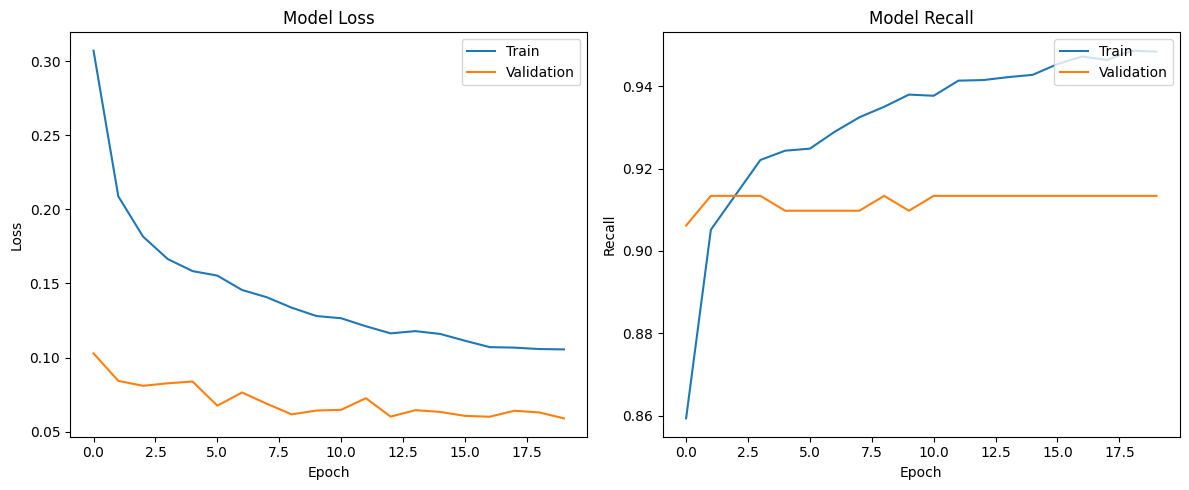

In [324]:
plot(history, 'loss', 'recall')

In [325]:
results.loc[27] = [[5, 'batch normalized'], [128, 64, 32, 12, 8], ['relu', 'tanh', 'relu', 'tanh', 'relu'], 20, 64, history.history["val_loss"][-1], history.history["val_accuracy"][-1],
                   history.history["val_precision"][-1], history.history["val_recall"][-1], 'adam', [0.2, 0.2, 0.15, 0.15, 1], '-', round(end-start,2)]

results

# hidden layers              # neurons - hidden layer  \
0                       0                                     -   
1                       0                                     -   
2                       0                                     -   
3                       0                                     -   
4                       0                                     -   
5                       1                                     6   
6                       1                                    12   
7                       1                                    24   
8                       1                                    12   
9                       1                                    12   
10                      2                               [12, 6]   
11                      2                               [12, 6]   
12                      2                               [12, 6]   
13                      2                              [12, 12]   
14                      2                              [12, 24]   
15                      2                              [12, 12]   
16                      3                           [12, 12, 6]   
17                      3                           [12, 12, 6]   
18                      3                          [12, 12, 12]   
19                      3                          [12, 12, 12]   
20                      3                          [12, 12, 12]   
21                      4                       [12, 12, 12, 6]   
22                     10  [12, 12, 12, 6, 12, 6, 12, 6, 12, 6]   
23                      3                          [12, 12, 12]   
24                      3                          [12, 12, 12]   
25  [3, batch normalized]                           [32, 16, 8]   
26  [4, batch normalized]                       [64, 32, 12, 8]   
27  [5, batch normalized]                  [128, 64, 32, 12, 8]   

                   activation function - hidden layer  # epochs  batch size  \
0                                                   -        10       28334   
1                                                   -        10           1   
2                                                   -        10          32   
3                                                   -        10          64   
4                                                   -        25          64   
5                                             sigmoid        20          64   
6                                             sigmoid        20          64   
7                                             sigmoid        20          64   
8                                                relu        20          64   
9                                                tanh        20          64   
10                                    [relu, sigmoid]        20          64   
11                                       [relu, relu]        20          64   
12                                       [relu, tanh]        20          64   
13                                       [relu, tanh]        20          64   
14                                       [relu, tanh]        20          64   
15                                       [relu, tanh]        20          64   
16                                 [relu, tanh, relu]        20          64   
17                                 [relu, tanh, tanh]        20          64   
18                                 [relu, tanh, relu]        20          64   
19                                 [relu, tanh, relu]        20          64   
20                                 [relu, tanh, relu]        20          64   
21                           [relu, tanh, relu, relu]        20          64   
22  [relu, tanh, relu, tanh, relu, tanh, relu, tan...        50          64   
23                                 [relu, tanh, relu]        20          64   
24                                 [relu, tanh, relu]        20          64   
25          

- Increasing the model's complexity hasn't increased our model's performance:
 - The recall is the same.
 - Precision has dropped to 86.35%
 - The loss has decreased further.
- Model 25 has given the best performance.
 - It has good recall of 91.34% which is near to all the other models which have performed well with recall.
 - It has the highest precision of 90%.
 - Model 26 has given similar performance but is more complex.
- We will finalize our model building with Model 25 as the final model and evaluate this model's performance on the test data.


## Test set final performance

In [326]:
print(X_test.shape, y_test.shape)

(5000, 40) (5000,)


In [327]:
print(y_test.value_counts())

Target
0    4718
1     282
Name: count, dtype: int64


In [331]:
test_loss, test_accuracy, test_precision, test_recall = model_25.evaluate(X_test, y_test, verbose=1)

# Compute F1-score separately
y_pred_probs = model_25.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)  # Convert probabilities to binary labels
test_f1 = f1_score(y_test, y_pred)

results_test_df = pd.DataFrame({
    "Metric": ["Loss", "Accuracy", "Precision", "Recall", "F1-score"],
    "Value": [test_loss, test_accuracy, test_precision, test_recall, test_f1]
})

results_test_df.T

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0863 - precision: 0.8574 - recall: 0.8582
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0         1          2         3         4
Metric      Loss  Accuracy  Precision    Recall  F1-score
Value   0.083163    0.9876   0.895683  0.882979  0.889286

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


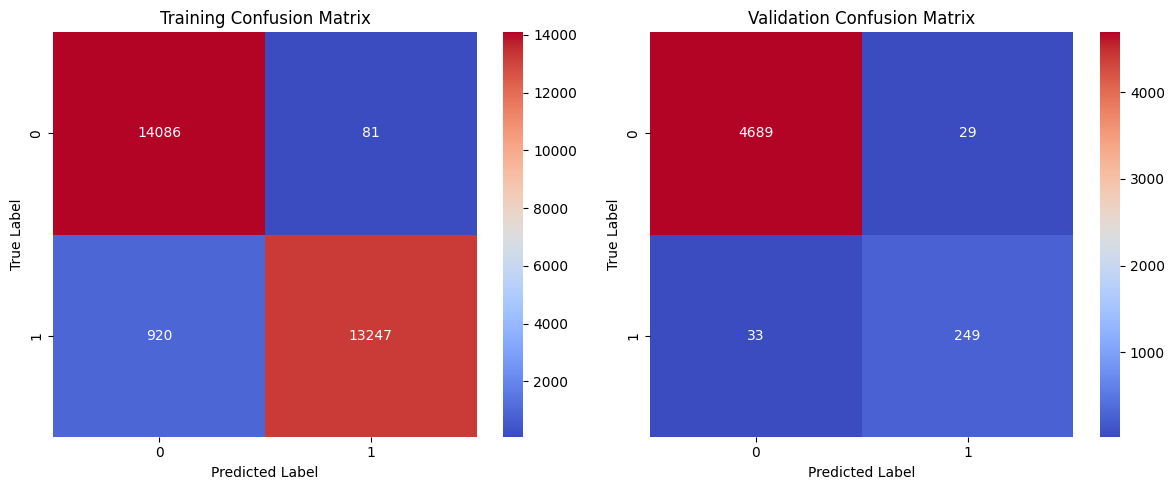

In [333]:
plot_confusion_matrices(model_25, X_train, y_train, X_test, y_test)

- The model's performance on the test set:
 - The model has predicted 249 out of 282 failures, which is a recall of 88.3%.
 - Out of the 278 failures predicted by the model 249 were real failures, which is a precision of 89.57%.
 - The model has correctly predicted 249 failures 4689 non-failures, which is an accuracy of 87.76%.
- The model's performance of the training set:
 - The model has predicted 13247 out of 14167 failures, which is a recall of 93.51%.
 - Out of the 13328 failures predicted by the model 13247 were real failures, which is a precision of 99.39%.
 - The model has correctly predicted 13247 failures and 14086 non-failures, which is an accuracy of 96.47%

# Insights and Recommendation

- A Neural network model has been built to predict the possibility of generator failure of wind turbines and minimize the overall maintenance cost of machinery/processes used by the company for wind energy production.
- We have built 28 different neural networks-each with different characteristics and building each one upon the previous one. We have chosen Model 25 as the best one. This model is also not complex.
- The model is expected to generalize well as the recall and precision on both the validation and the test set are approximately 90%.
- Therefore, we can expect to save a huge amount of the cost being spent on mantainance by using this model to predict failures(and replacing the parts) than without using any failure deteectin mechanism.
- We can further improve our model by training it using a dataset with more examples. With more training examples, we can build more complex models and expect the models to perform better.